In [ ]:
 from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


# Import Library

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option("display.max_columns", None)
pd.set_option("display.max_rows", None)

In [ ]:
from matplotlib import rcParams

rcParams['figure.figsize'] = 12,5
rcParams['lines.linewidth'] = 3
rcParams['xtick.labelsize'] = 'x-large'
rcParams['ytick.labelsize'] = 'x-large'

# Load Dataset

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/dataset/train_20D8GL3.csv')

In [ ]:
#df = pd.read_csv('/content/gdrive/MyDrive/dataset/paymentdefault/train_20D8GL3.csv')

Dataset yang digunakan adalah data train untuk payment default prediction. Berikut link untuk mengakses datasetnya: https://www.kaggle.com/datasets/reverie5/av-janata-hack-payment-default-prediction?select=train_20D8GL3.csv

### Deskripsi Kolom

*   <b>ID</b> : Unique ID of each client
*   <b>LIMIT_BAL</b> : Amount of given credit (NT dollars): It includes both the individual consumer credit and his/her family
*   <b>SEX</b> : Gender (1=male, 2=female)
*   <b>EDUCATION</b> : 1=graduate school, 2=university, 3=high school, 4=others, 5=unknown, 6=unknown
*   <b>MARRIAGE</b> : Marital status (1=married, 2=single, 3=divorced)
*   <b>AGE</b> : Age of the client
*   <b>PAY_0</b> : Repayment status in September, 2005 (-1=pay duly, 1=payment delay for one month, 2=payment delay for two months) -2 = bayar tagihan penuh dan tidak ada tagihan dibulan tersebut 0 = bayar minimal dari total tagihan bulan tersebut
*   <b>PAY_2</b> : Repayment status in August, 2005 (scale same as above
*   <b>PAY_3</b> : Repayment status in July, 2005 (scale same as above)
*   <b>PAY_4</b> : Repayment status in June, 2005 (scale same as above)
*   <b>PAY_5 </b>: Repayment status in May, 2005 (scale same as above)
*   <b>PAY_6 </b>: Repayment status in April, 2005 (scale same as above)
*   <b>BILL_AMT1 </b>: Amount of bill statement in September, 2005 (NT dollar)
*   <b>BILL_AMT2 </b>: Amount of bill statement in August, 2005 (NT dollar)
*   <b>BILL_AMT3 </b>: Amount of bill statement in July, 2005 (NT dollar)
*   <b>BILL_AMT4 </b>: Amount of bill statement in June, 2005 (NT dollar)
*   <b>BILL_AMT5 </b>: Amount of bill statement in May, 2005 (NT dollar)
*   <b>BILL_AMT6 </b>: Amount of bill statement in April, 2005 (NT dollar)
*   <b>PAY_AMT1 </b>: Amount of previous payment in September, 2005 (NT dollar)
*   <b>PAY_AMT2 </b>: Amount of previous payment in August, 2005 (NT dollar)
*   <b>PAY_AMT3 </b>: Amount of previous payment in July, 2005 (NT dollar)
*   <b>PAY_AMT4 </b>: Amount of previous payment in June, 2005 (NT dollar)
*   <b>PAY_AMT5 </b>: Amount of previous payment in May, 2005 (NT dollar)
*   <b>PAY_AMT6 </b>: Amount of previous payment in April, 2005 (NT dollar)
*   <b>default_payment_next_month</b> : Target Variable: Default payment (1=yes, 0=no)






















#Stage 1 - EDA,Visualization & Insights

## Descriptive Statistic

### Memeriksa missing value

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_0                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

Semua fitur dan label bertype integer

In [ ]:
row_n,col_n=df.shape
missing_value = pd.DataFrame(df.isna().sum(), columns = ['Missing_Values'])
missing_value['Filling_Values (%)'] = (row_n-missing_value['Missing_Values'])*100/row_n
missing_value['Dtypes'] = df.dtypes.values
missing_value

,Missing_Values,Filling_Values (%),Dtypes
ID,0,100.0,int64
LIMIT_BAL,0,100.0,int64
SEX,0,100.0,int64
EDUCATION,0,100.0,int64
MARRIAGE,0,100.0,int64
AGE,0,100.0,int64
PAY_0,0,100.0,int64
PAY_2,0,100.0,int64
PAY_3,0,100.0,int64
PAY_4,0,100.0,int64


Dataset tidak terdapat memiliki missing value.

### Memeriksa duplicated value

In [ ]:
df.duplicated().any()

False

## Melihat isi data

In [ ]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,...,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,...,2240,1681,2267,0,0,2240,0,2267,3074,0
2,3092,320000,2,2,1,41,0,0,0,0,...,35409,35036,35939,5000,2000,2000,3000,3000,1500,0
3,13973,50000,2,2,2,24,-1,-1,-2,-2,...,0,0,0,0,0,0,0,0,0,1
4,10567,80000,1,3,1,52,-1,0,0,0,...,20561,21261,21457,1500,1500,1500,1028,876,1449,0


In [ ]:
df.tail()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
20995,6283,50000,2,2,2,31,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,0
20996,25589,80000,2,2,1,37,0,0,0,0,...,45458,48679,49895,5000,3000,2000,4000,2000,2000,0
20997,4378,100000,1,1,1,52,1,2,2,2,...,23440,28843,31353,0,3600,0,6000,3000,0,1
20998,8604,90000,2,2,1,47,0,0,0,0,...,28747,29177,29452,2000,2000,2000,2000,2000,2000,0
20999,18049,90000,1,3,1,44,1,-2,-2,-2,...,0,0,0,0,0,0,0,0,0,1


In [ ]:
df.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
3267,28570,200000,2,1,1,29,-1,-1,-1,-1,...,3043,1542,0,2215,2451,3043,1542,0,0,0
18143,26922,720000,1,1,1,40,0,0,0,0,...,148956,135217,85300,8500,6000,6000,5237,3000,8961,1
14542,13064,90000,1,1,2,31,0,0,0,0,...,58792,58402,59633,2950,3000,2205,2300,2300,3000,1
8095,28112,210000,2,2,1,36,0,0,0,0,...,15748,16069,13780,1534,1307,1116,437,399,276,0
9051,25292,100000,2,1,2,26,0,0,0,0,...,64692,66114,67396,4000,3000,2500,2500,2500,2600,0


In [ ]:
df["ID"].nunique()

21000


## Catatan
* Data ini berisi data 21000 nasabah bank dengan total 21000 baris dan 25 kolom
* Dataset memiliki data categorical dengan tipe data int
* Untuk memudahkan visualisasi , data categorical  akan dirubah kebentuk yang semestinya
* Untuk menyeragamkan, kolom PAY_0 akan diubah menjadi PAY_1
* Variabel target adalah kolom default_payment_next_month dengan tipe data int sementara kolom-kolom lainnya adalah variabel fitur




### Mengubah Tipe Data untuk Data Kategorikal

In [ ]:
# Mengubah tipe data untuk kolom SEX
df['SEX'] = df['SEX'].replace(1, "Male")
df['SEX'] = df['SEX'].replace(2, "Female")

# Menghitung banyak data untuk masing-masing kategori di kolom SEX
df_value_sex = df['SEX'].value_counts().reset_index()
df_value_sex.columns = ["SEX","COUNT"]
df_value_sex

,SEX,COUNT
0,Female,12759
1,Male,8241


In [ ]:
# Menghitung banyak data untuk masing-masing kategori di kolom EDUCATION (sebelum tipe data diubah)
df['EDUCATION'].value_counts()

2    9789
1    7415
3    3467
5     200
4      85
6      34
0      10
Name: EDUCATION, dtype: int64

In [ ]:
# Mengubah tipe data untuk kolom EDUCATION
df['EDUCATION'] = df['EDUCATION'].replace(1, "Graduate_School")
df['EDUCATION'] = df['EDUCATION'].replace(2, "University")
df['EDUCATION'] = df['EDUCATION'].replace(3, "High_School")
df['EDUCATION'] = df['EDUCATION'].replace(4, "Others")
df['EDUCATION'] = df['EDUCATION'].replace(5, "Others")
df['EDUCATION'] = df['EDUCATION'].replace(6, "Others")
df['EDUCATION'] = df['EDUCATION'].replace(0, "Others")

# Menghitung banyak data untuk masing-masing kategori di kolom EDUCATION (sesudah tipe data diubah)
df_value_education = df['EDUCATION'].value_counts().reset_index()
df_value_education.columns = ["EDUCATION","COUNT"]
df_value_education

,EDUCATION,COUNT
0,University,9789
1,Graduate_School,7415
2,High_School,3467
3,Others,329


In [ ]:
# Menghitung banyak data untuk masing-masing kategori di kolom MARRIAGE (sebelum tipe data diubah)
df['MARRIAGE'].value_counts()

2    11184
1     9561
3      219
0       36
Name: MARRIAGE, dtype: int64

In [ ]:
# Mengubah tipe data untuk kolom MARRIAGE
df['MARRIAGE'] = df['MARRIAGE'].replace(1, "Married")
df['MARRIAGE'] = df['MARRIAGE'].replace(2, "Single")
df['MARRIAGE'] = df['MARRIAGE'].replace(3, "Divorced")
df['MARRIAGE'] = df['MARRIAGE'].replace(0, "Unknown")

# Menghitung banyak data untuk masing-masing kategori di kolom MARRIAGE (sesudah tipe data diubah)
df_value_marriage = df['MARRIAGE'].value_counts().reset_index()
df_value_marriage.columns = ["MARRIAGE","COUNT"]
df_value_marriage

,MARRIAGE,COUNT
0,Single,11184
1,Married,9561
2,Divorced,219
3,Unknown,36


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          21000 non-null  int64 
 1   LIMIT_BAL                   21000 non-null  int64 
 2   SEX                         21000 non-null  object
 3   EDUCATION                   21000 non-null  object
 4   MARRIAGE                    21000 non-null  object
 5   AGE                         21000 non-null  int64 
 6   PAY_0                       21000 non-null  int64 
 7   PAY_2                       21000 non-null  int64 
 8   PAY_3                       21000 non-null  int64 
 9   PAY_4                       21000 non-null  int64 
 10  PAY_5                       21000 non-null  int64 
 11  PAY_6                       21000 non-null  int64 
 12  BILL_AMT1                   21000 non-null  int64 
 13  BILL_AMT2                   21000 non-null  in

### Pengelompokan Data

In [ ]:
# Data kategorikal
category =['SEX','EDUCATION','MARRIAGE']
pay_delay = ['PAY_0','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Data numerikal
nums = ['LIMIT_BAL', 'AGE',
        'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
        'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

nums1 = ['LIMIT_BAL','AGE']

bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

## Statistical Summary

 ### Data Kategorikal

In [ ]:
df[category].describe().T

,count,unique,top,freq
SEX,21000,2,Female,12759
EDUCATION,21000,4,University,9789
MARRIAGE,21000,4,Single,11184


Hasil Pengamatan Data Kategorikal :<br>
* Mayoritas data adalah female dengan frekuensi 12759
* Mayoritas education adalah university dengan frekuensi 9789
* Mayoritas status pernikahan adalah single dengan frekuensi 11184

### Data Numerikal

In [ ]:
df[nums].describe()

,LIMIT_BAL,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000,2.100000e+04,21000.000000,21000.000000,21000.000000,21000.000000
mean,167214.746667,35.461619,51501.542381,49463.502667,4.723258e+04,43387.372476,40398.551095,38931.194000,5686.349333,5.923003e+03,5202.325333,4793.172000,4797.012952,5211.736762
std,128965.188482,9.206628,73453.641859,70866.586004,6.953988e+04,64081.073110,60396.811177,59196.499234,16868.075695,2.390953e+04,17006.416467,15467.403159,15270.031988,17698.795697
min,10000.000000,21.000000,-14386.000000,-69777.000000,-1.572640e+05,-170000.000000,-81334.000000,-209051.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,50000.000000,28.000000,3564.750000,3000.000000,2.686250e+03,2332.000000,1759.000000,1242.750000,998.250000,8.360000e+02,390.000000,284.000000,241.000000,102.000000
50%,140000.000000,34.000000,22578.000000,21550.000000,2.024200e+04,19158.500000,18266.500000,17203.500000,2100.000000,2.011000e+03,1811.500000,1500.000000,1500.000000,1500.000000
75%,240000.000000,41.000000,67876.250000,64918.250000,6.082675e+04,55376.750000,50517.250000,49463.000000,5023.250000,5.000000e+03,4500.000000,4002.250000,4051.000000,4000.000000
max,800000.000000,75.000000,746814.000000,743970.000000,1.664089e+06,706864.000000,587067.000000,699944.000000,873552.000000,1.684259e+06,889043.000000,621000.000000,417990.000000,528666.000000


Hasil pengamatan :
* Mayoritas fitur memiliki nilai mean > median yang menandakan fitur cenderung berdistribusi positively skewed, hanya fitur AGE yang mendekati distribusi normal
* Data-data pada kolom numerikal kemungkinan memiliki outlier karena perbedaan antara nilai median dan nilai max pada datanya relatif jauh
* Terdapat nilai minus pada fitur BILL_AMT dan nilai 0 pada PAY_AMT


### Default Payment Next Month

In [ ]:
df["default_payment_next_month"].describe()

count    21000.000000
mean         0.221190
std          0.415058
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: default_payment_next_month, dtype: float64

In [ ]:
# Menghitung banyak nasabah yang default dan tidak default (0-tidak default, 1-default)
df_default_count = df["default_payment_next_month"].value_counts().reset_index()
df_default_count.columns = ["default_payment_next_month","count"]

# Mencari default rate
df_default_count["default_rate"] = df_default_count["count"] / 21000 * 100

df_default_count

,default_payment_next_month,count,default_rate
0,0,16355,77.880952
1,1,4645,22.119048


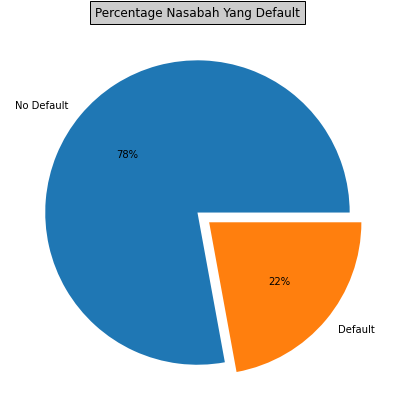

In [ ]:
plt.figure(figsize = (7,7))
y = df_default_count['default_rate']
mylabels = ['No Default','Default']
plt.pie(y, labels = mylabels,autopct='%1.0f%%',explode=[0,0.1])
plt.title('Percentage Nasabah Yang Default',bbox={'facecolor':'0.8', 'pad':5})
plt.show()

Hasil pengamatan :
* Jumlah nasabah yang mengalami default lebih sedikit daripada jumlah nasabah yang tidak mengalami default
* Meskipun jumlah nasabah yang mengalami default lebih sedikit, default rate nasabah di bank tersebut relatif besar yaitu sebesar 22% (umumnya default rate nasabah di sebuah bank di Taiwan adalah 2%)

### Rangkuman

1. Dataset memiliki 21000 baris dan 25 kolom
2. Semua kolom tertype integer
3. Fitur PAY_0 tidak sesuai urut akan diganti PAY_1
4. Untuk memudahkan visualisasi , data kategorikal akan dirubah kebentuk yang semestinya
5. Variabel target adalah kolom default_payment_next_month dengan tipe data int sementara kolom-kolom lainnya adalah variabel fitur
6. Tidak terdapat duplikat data dan missing value
7. Mayoritas nasabah adalah perempuan,dengan pendidikan University dan berstatus Single
8. Nilai unique pada fitur kategorikal tidak banyak
9. Jumlah nasabah yang default adalah  22%
10. Pada BILL_AMT3 memiliki nilai max 1.664089e+06 dan PAY_AMT3 nilai max 1.684259e+06 nilai ini terlalu tinggi dalam tagihan dan pembayaran dimana kredit limit maximal 800000, diduga data typo atau salah input akan dilakukan handling outlier

## Univariate Analysis


### Memeriksa Outlier Menggunakan Boxplot

### ID

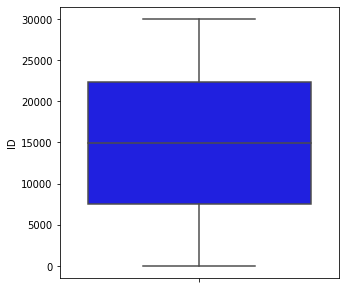

In [ ]:
# Membuat boxplot untuk data pada kolom ID
plt.figure(figsize=(5, 5))
sns.boxplot(y=df["ID"], color='blue', orient='v')
plt.show()

### AGE dan LIMIT_BALL

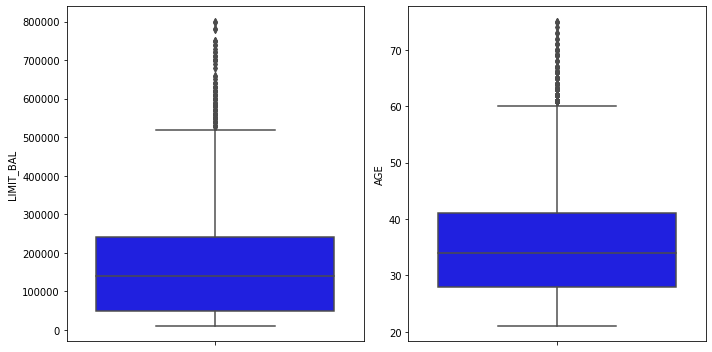

In [ ]:
# Membuat boxplot untuk data pada kolom LIMIT_BAL, dan AGE
plt.figure(figsize=(10, 5))
for i in range(0, len(nums1)):
    plt.subplot(1, len(nums1), i+1)
    sns.boxplot(y=df[nums1[i]], color='blue', orient='v')
    plt.tight_layout()

### PAY_AMT

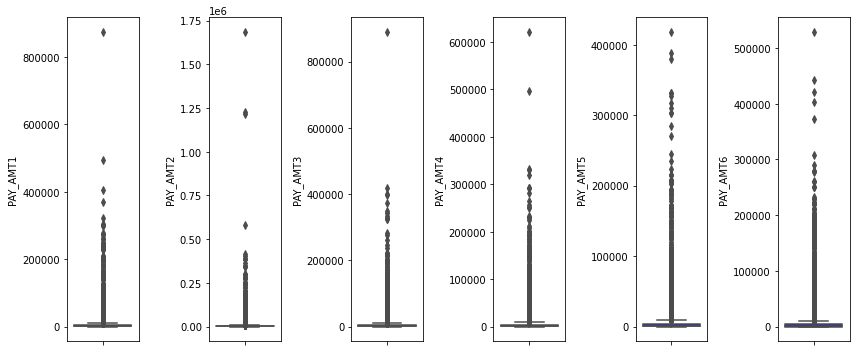

In [ ]:
# Membuat boxplot untuk data pada kolom PAY_AMT1 sampai PAY_AMT6
plt.figure(figsize=(12, 5))
for i in range(0, len(pay_amt)):
    plt.subplot(1, len(pay_amt), i+1)
    sns.boxplot(y=df[pay_amt[i]], color='blue', orient='v')
    plt.tight_layout()

### BILL_AMT

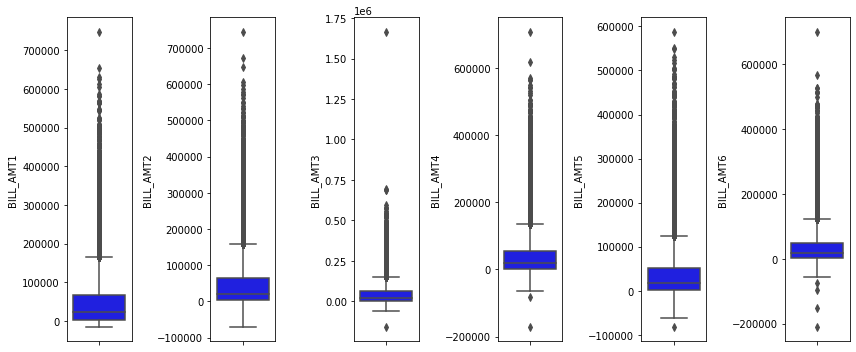

In [ ]:
# Membuat boxplot untuk data pada kolom BILL_AMT1 sampai BILL_AMT6
plt.figure(figsize=(12, 5))
for i in range(0, len(bill_amt)):
    plt.subplot(1, len(bill_amt), i+1)
    sns.boxplot(y=df[bill_amt[i]], color='blue', orient='v')
    plt.tight_layout()

## Memeriksa Distribusi Data

### AGE dan LIMIT_BALL

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


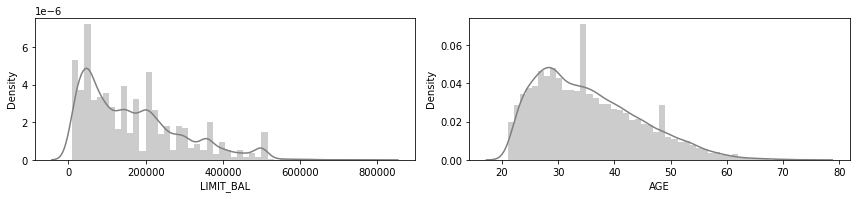

In [ ]:
# Memeriksa distribusi data untuk data pada kolom LIMIT_BAL dan AGE
plt.figure(figsize=(12, 5))
for i in range(0, len(nums1)):
    plt.subplot(2, len(nums1), i+1)
    sns.distplot(df[nums1[i]], color='gray')
    plt.tight_layout()

In [ ]:
df["LIMIT_BAL"].value_counts().reset_index().head(5)

,index,LIMIT_BAL
0,50000,2388
1,20000,1395
2,80000,1107
3,30000,1076
4,200000,1033


Limit dengan nasabah terbanyak : NTD 20.000, NTD 30.000, <b>NTD 50.000</b>, NTD 80.000, NTD 200.000

In [ ]:
  df["AGE"].value_counts().reset_index().head(5)

,index,AGE
0,29,1088
1,27,1052
2,28,993
3,30,972
4,26,879


Nasabah bank ini paling banyak berusia 26 tahun, 27 tahun, 28 tahun, **29 tahun**, 30 tahun.

### PAY_AMT

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

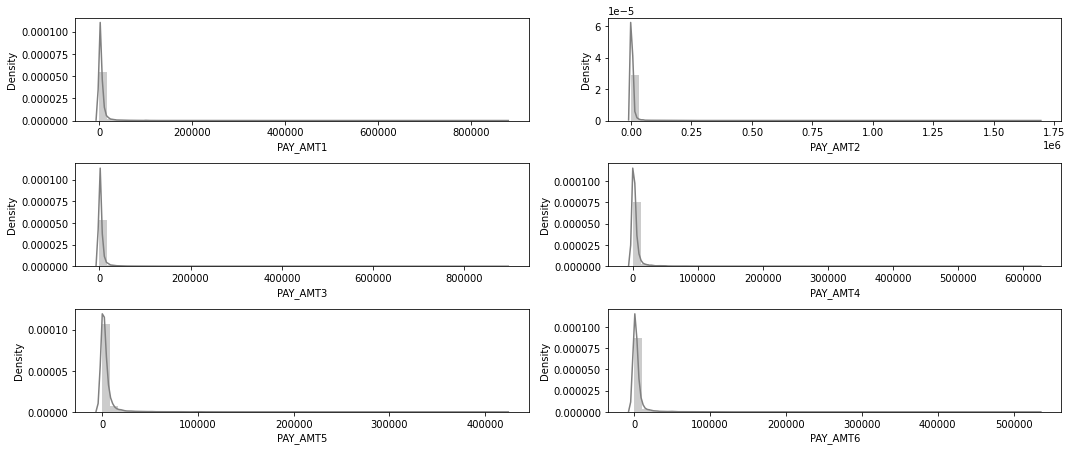

In [ ]:
# Memeriksa distribusi data untuk data pada kolom PAY_AMT1 sampai PAY_AMT6
plt.figure(figsize=(15, 12))
for i in range(0, len(pay_amt)):
    plt.subplot(len(pay_amt),2, i+1)
    sns.distplot(df[pay_amt[i]], color='gray')
    plt.tight_layout()

### BILL_AMT

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

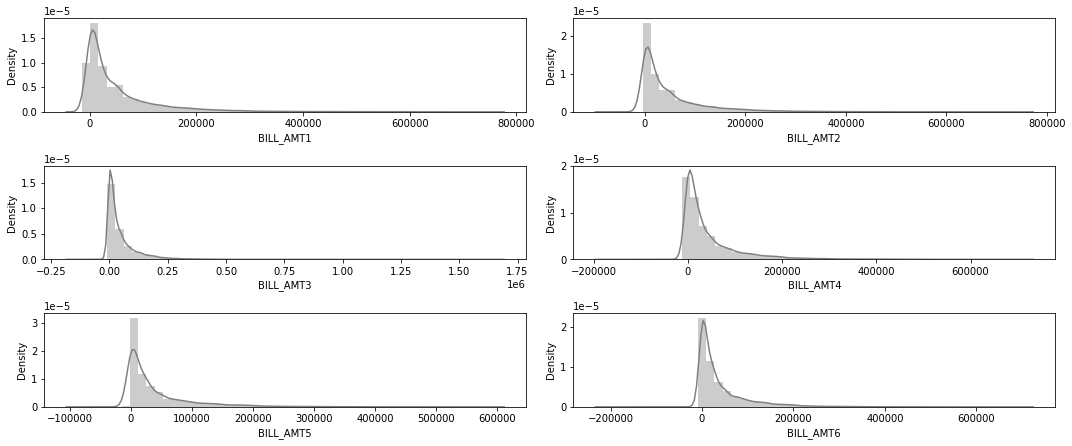

In [ ]:
# Memeriksa distribusi data untuk data pada kolom BILL_AMT1 sampai BILL_AMT6
plt.figure(figsize=(15, 12))
for i in range(0, len(bill_amt)):
    plt.subplot(len(bill_amt),2, i+1)
    sns.distplot(df[bill_amt[i]], color='gray')
    plt.tight_layout()

### PAY

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

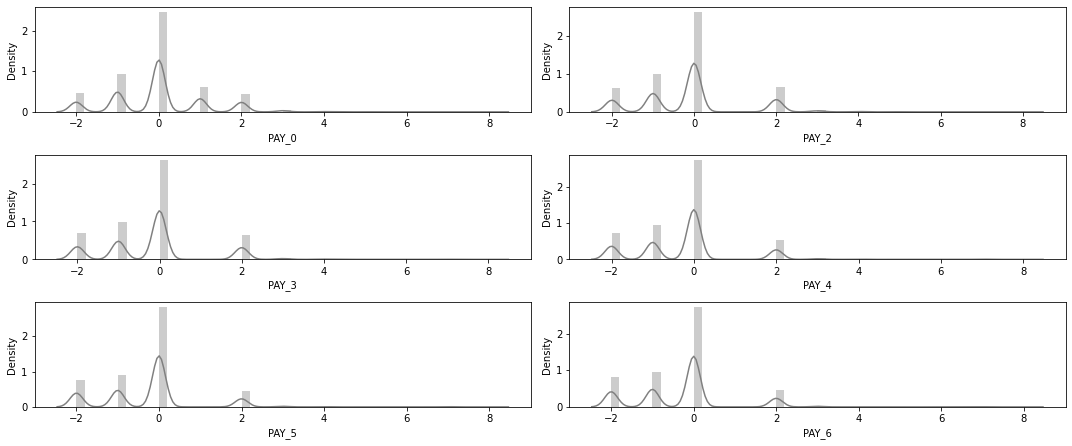

In [ ]:
# Memeriksa distribusi data untuk data pada kolom PAY_1 sampai PAY_6
plt.figure(figsize=(15, 12))
for i in range(0, len(pay_delay)):
    plt.subplot(len(pay_delay),2, i+1)
    sns.distplot(df[pay_delay[i]], color='gray')
    plt.tight_layout()

### SEX

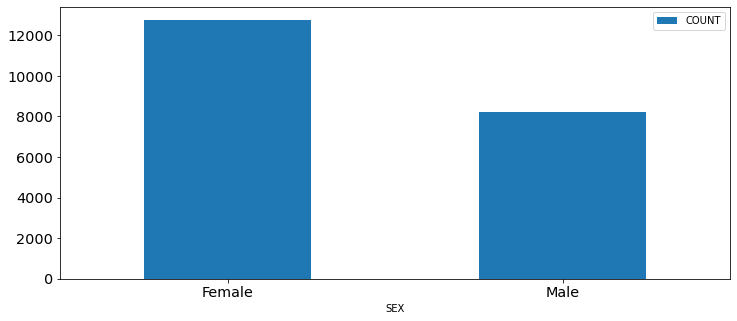

In [ ]:
# Melihat persebaran data pada kolom SEX
df_value_sex.plot(x = "SEX", kind = "bar")
plt.xticks(rotation = 0)
plt.show()

### EDUCATION

<Figure size 720x720 with 0 Axes>

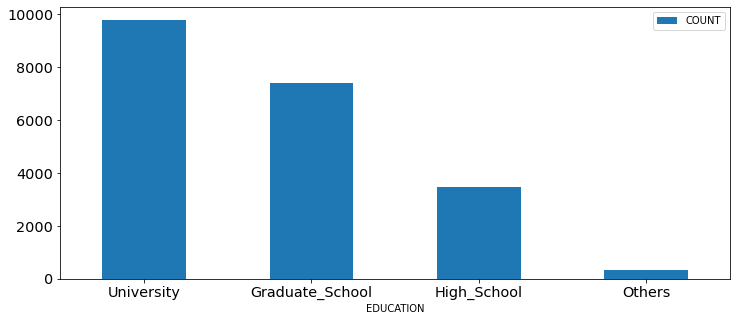

In [ ]:
# Melihat persebaran data pada kolom EDUCATION
plt.figure(figsize=(10,10))
df_value_education.plot(x = "EDUCATION", kind = "bar")
plt.xticks(rotation = 0)
plt.show()

### MARRIAGE

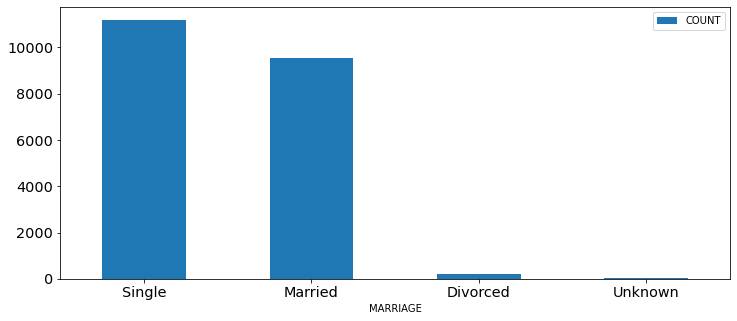

In [ ]:
# Melihat persebaran data pada kolom MARRIAGE
df_value_marriage.plot(x = "MARRIAGE", kind = "bar")
plt.xticks(rotation = 0)
plt.show()

Hasil Pengamatan : <br>
1. Mayoritas fitur memiliki outlier,kecuali ID,AGE dan LIMIT_BALL
2. BILL_AMT dan PAY_AMT distribusi positively skewed
3. Terdapat nilai minus/negatif pada fitur BILL_AMT

## Multivariate Analysis

### Memeriksa Korelasi

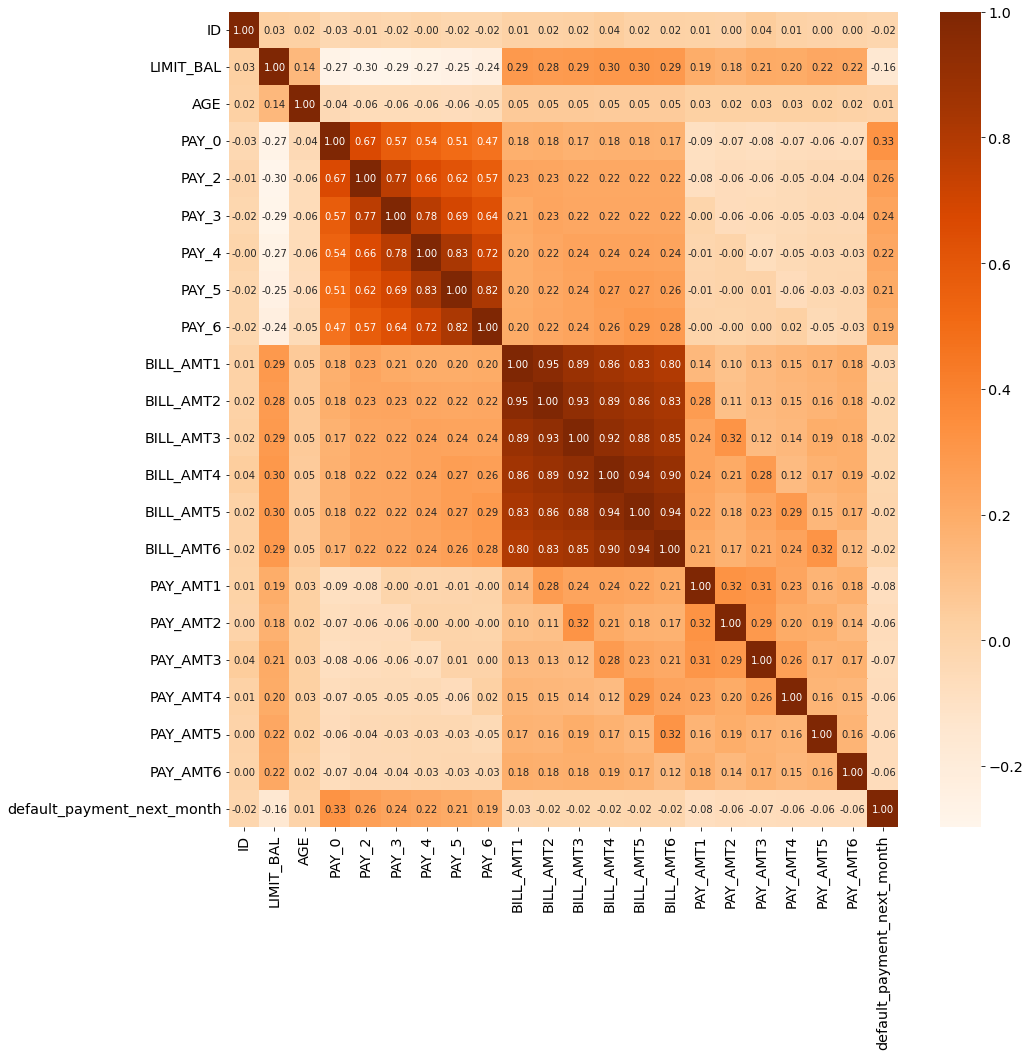

In [ ]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), cmap='Oranges', annot=True, fmt='.2f')
plt.show()

Hasil pengamatan :
* Korelasi paling kuat terjadi antara kolom PAY_X dengan kolom PAY_X lainnya (X = 1,2,3,4,5,6) dan antara kolom BILL_AMTX dengan kolom BILL_AMTX lainnya (X = 1,2,3,4,5,6).
* Dari nilai korelasi antara BILL_AMT6 dengan BILL_AMT5, BILL_AMT5 dengan BILL_AMT4, BILL_AMT3 dengan BILL_AMT2, dan BILL_AMT2 dengan BILL_AMT1 adalah akumulasi dari jumlah tagihan atau BILL_AMT yang sudah dibayar atau belum dibayar.
  * Hal ini dapat dipengaruhi oleh adanya bunga kartu kredit dan biaya keterlambatan pembayaran.
* Nilai korelasi antara PAY_6 dengan PAY_5 adalah 0.82, PAY_5 dengan PAY_4 berkorelasi sebesar 0.83, PAY_4 dengan PAY_3 berkorelasi sebesar 0.78, PAY_3 dengan PAY_2 berkorelasi sebesar 0.77, PAY_2 dengan PAY_1 berkorelasi sebesar 0.67.
  * Dari sini dapat dilihat bahwa hubungan antara repayment status seorang nasabah dari bulan satu ke bulan lainnya semakin lama cenderung semakin lemah (dari PAY_6 ke PAY_1).
  * Dari nilai-nilai korelasi ini didapat juga bahwa apabila di bulan sebelumnya nasabah menunggak pembayaran tagihan kartu kredit, maka di bulan berikutnya nasabah tersebut juga kemungkinan besar akan kembali menunggak. Begitu pula sebaliknya. Jika di bulan sebelumnya nasabah melakukan pembayaran tepat waktu / tidak menunggak, maka kemungkinan besar di bulan berikutnya nasabah juga tidak akan menunggak.
* Di antara kolom-kolom lainnya, kolom yang paling berkorelasi dengan variabel target adalah kolom PAY_1 yang kemudian diikuti dengan kolom PAY_2, PAY_3, PAY_4, PAY_5, dan PAY_6.
* Limit nasabah memiliki korelasi positif yang lemah (sampai dengan 0.3) dengan jumlah tagihan nasabah (BILL_AMT).
  * Ada kemungkinan semakin besar limit nasabah, semakin besar juga jumlah tagihannya. Begitu pula sebaliknya.
* Limit nasabah memiliki korelasi negatif yang lemah dengan repayment status (PAY_1 sampai PAY_6).
  * Ada kemungkinan semakin besar limit nasabah, semakin kecil nilai pada status repaymentnya. Begitu pula sebaliknya.

## Pairplot

### PAY

<Figure size 1080x1080 with 0 Axes>

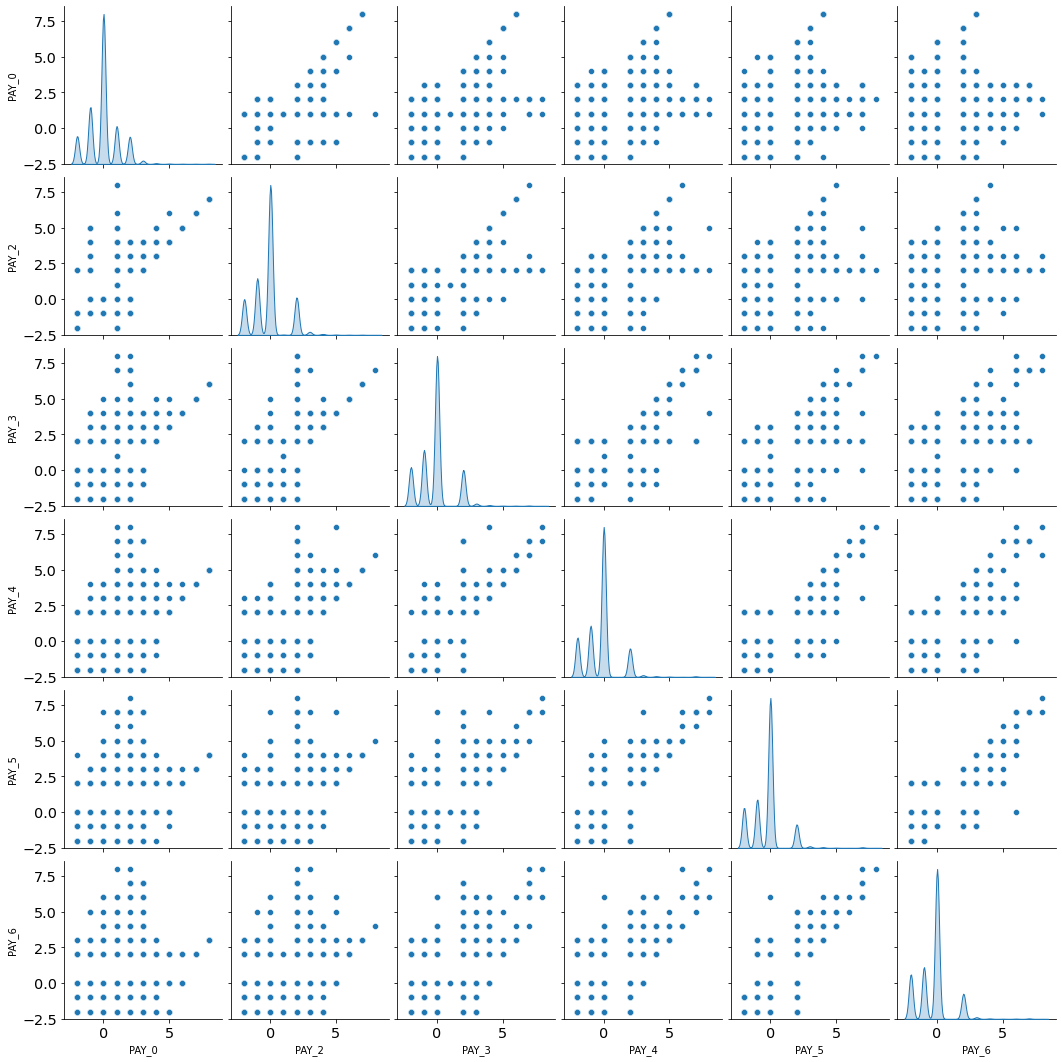

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[pay_delay], diag_kind='kde')

### BILL_AMT

<Figure size 1080x1080 with 0 Axes>

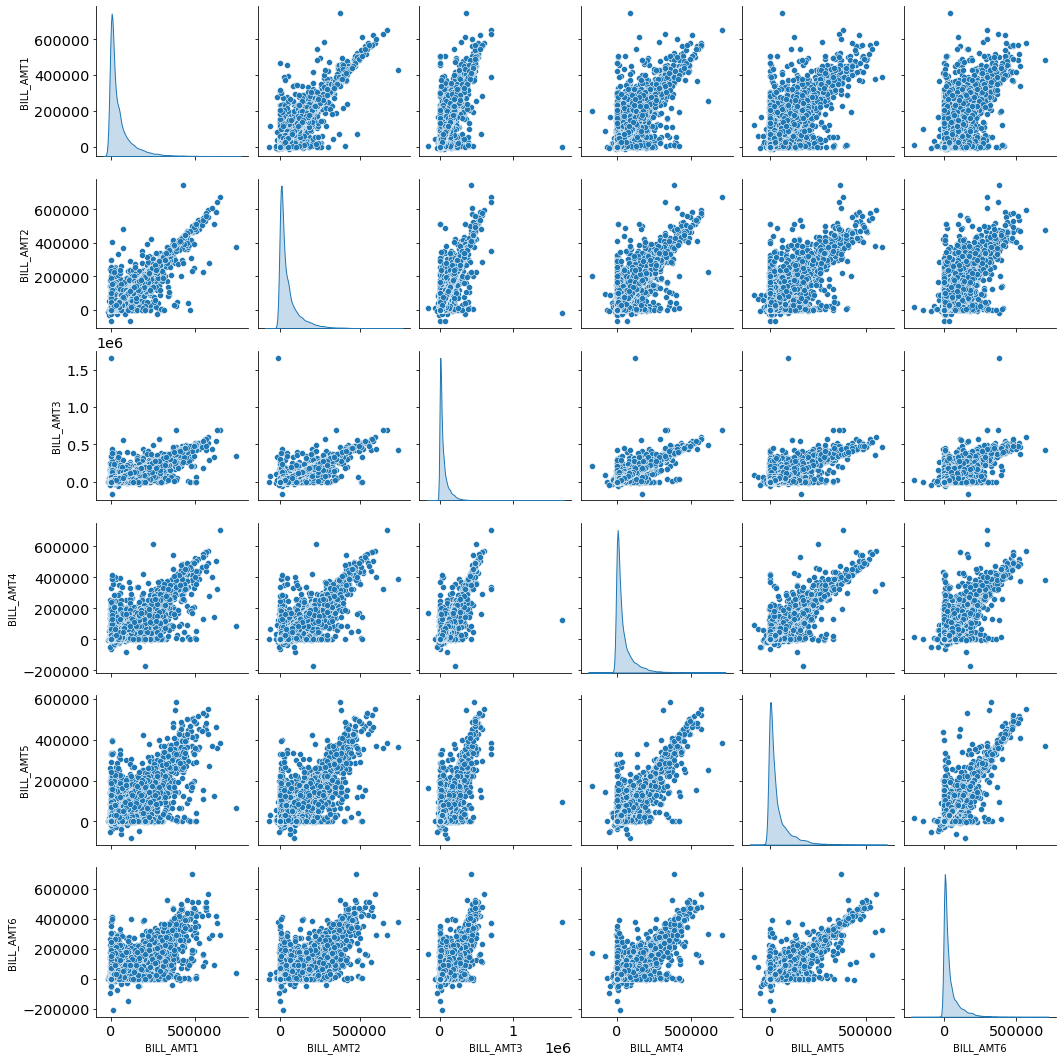

In [ ]:
plt.figure(figsize=(15, 15))
sns.pairplot(df[bill_amt], diag_kind='kde')

## Bivariate Analysis

### Kategori Umur dan Limit

In [ ]:
# kategori umur
def get_age_cat(age):
    if age > 60:
        cat = "Senior Citizen"
    elif age >= 46:
        cat = "Senior Adults"
    elif age >= 36:
        cat = "Middle-Aged Adults"
    elif age >= 20:
        cat = "Young Adults"
    return cat

In [ ]:
df["LIMIT_BAL"].describe()

count     21000.000000
mean     167214.746667
std      128965.188482
min       10000.000000
25%       50000.000000
50%      140000.000000
75%      240000.000000
max      800000.000000
Name: LIMIT_BAL, dtype: float64

In [ ]:
# kategori limit
def get_limit_cat(limit):
    if limit > 240000:
        cat = "High"
    elif limit > 140000:
        cat = "Medium"
    else:
        cat = "Low"
    return cat

In [ ]:
df1 = df

In [ ]:
df1["age_cat"] = df1["AGE"].apply(lambda x : get_age_cat(x))
df1["limit_cat"] = df1["LIMIT_BAL"].apply(lambda x : get_limit_cat(x))

In [ ]:
df1.sample(5)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,age_cat,limit_cat
18292,7974,50000,Male,High_School,Single,34,-1,2,2,-2,...,0,0,0,0,0,0,0,0,Young Adults,Low
6544,6281,180000,Female,University,Married,36,-1,-1,-2,-1,...,669,0,0,1012,0,669,0,0,Middle-Aged Adults,Medium
10961,28011,420000,Female,University,Single,29,0,0,0,0,...,308571,10000,10200,11000,21500,12000,15000,0,Young Adults,High
18751,25333,520000,Female,Graduate_School,Single,28,-1,0,0,-1,...,132050,40054,8011,151509,50263,59491,48326,0,Young Adults,High
11934,16924,20000,Male,University,Single,55,0,0,0,0,...,10575,1290,1321,1460,1213,1,357,0,Senior Adults,Low


### Default Percentage untuk Masing-masing Kategori Usia

Catatan : <br>
* Young Adults 	(20-35 tahun)
* Middle-Aged Adults 	 (36-45 tahun)
* Senior Adults 	 (46-59 tahun)
* Senior Citizen (60 tahun ke atas)

In [ ]:
df_age = df1.groupby(["age_cat","default_payment_next_month"])["ID"].count().reset_index()

df_age = pd.pivot_table(df_age, index = "age_cat", columns = "default_payment_next_month", values = "ID")
df_age = df_age.reset_index()
df_age.columns = ['age_cat','NON DEFAULT','DEFAULT']

df_age["total"] = df_age["NON DEFAULT"] + df_age["DEFAULT"]
df_age["default"] = round(df_age["DEFAULT"] / df_age["total"] * 100,2)          # dp_per_agecat
df_age["nondefault"] = round(df_age["NON DEFAULT"] / df_age["total"] * 100,2)   # ndp_per_agecat
df_age["dp_per_total_default"] = round(df_age["DEFAULT"] / 4645 * 100,2)
df_age["dp_per_all"] = df_age["DEFAULT"] / 21000 * 100


df_age = df_age.sort_values("total", ascending = False)
df_age

,age_cat,NON DEFAULT,DEFAULT,total,default,nondefault,dp_per_total_default,dp_per_all
3,Young Adults,9242,2540,11782,21.56,78.44,54.68,12.095238
0,Middle-Aged Adults,4671,1308,5979,21.88,78.12,28.16,6.228571
1,Senior Adults,2299,752,3051,24.65,75.35,16.19,3.580952
2,Senior Citizen,143,45,188,23.94,76.06,0.97,0.214286


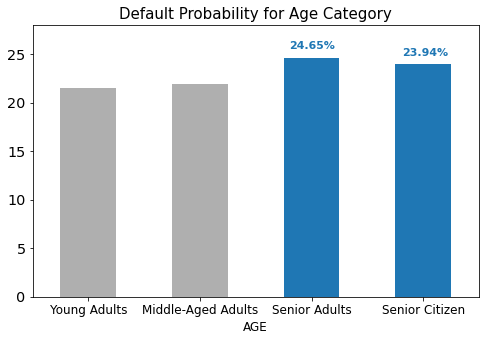

In [ ]:
df_age.plot(x = "age_cat", y = "default", kind = "bar",figsize = (8,5), ylim = (0,28),color = ["#afafaf","#afafaf","#1f77b4","#1f77b4"],legend = None)
plt.xticks(rotation = 0, fontsize = 12)
plt.xlabel("AGE", fontsize = 12)
plt.title("Default Probability for Age Category", fontsize = 15)
# plt.axhline(y=25.1, color='red', ls='--', lw=1.5)
plt.text(1.8, 25.5, s='24.65%',fontsize=11,color="#1f77b4",weight="bold")
plt.text(2.81, 24.8, s='23.94%',fontsize=11,color="#1f77b4",weight="bold")
plt.show()



Berdasarkan kategori usia, mayoritas nasabah yang default adalah Senior Adult dan Senior Citizen

### Melihat Default Percentage untuk Semua Usia

In [ ]:
df_age1 = df1[(df1["default_payment_next_month"] == 1)]["AGE"].value_counts().reset_index()
df_age1.columns = ["AGE","DEFAULT"]

df_age1["dp_per_total_default"] = df_age1["DEFAULT"] / 4645 * 100
df_age1["dp_per_all"] = df_age1["DEFAULT"] / 21000 * 100

df_age1.sort_values("AGE",ascending = True, inplace = True)

df_age1

,AGE,DEFAULT,dp_per_total_default,dp_per_all
40,21,8,0.172228,0.038095
19,22,133,2.863294,0.633333
7,23,174,3.745963,0.828571
4,24,202,4.348762,0.961905
1,25,223,4.800861,1.061905
5,26,182,3.918192,0.866667
0,27,225,4.843918,1.071429
3,28,206,4.434876,0.980952
2,29,221,4.757804,1.052381
6,30,178,3.832078,0.847619


<Figure size 1080x1080 with 0 Axes>

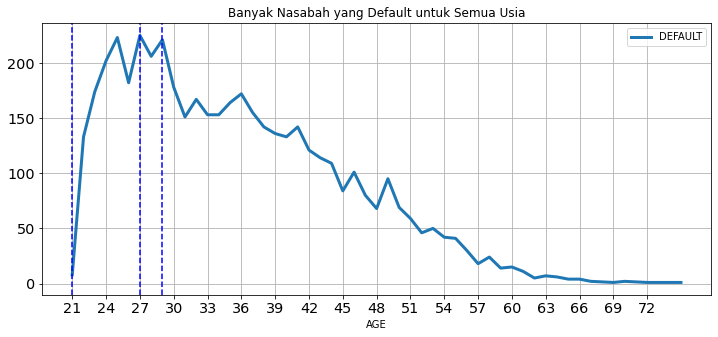

In [ ]:
plt.figure(figsize=(15, 15))
df_age1.plot(x = "AGE", y = "DEFAULT", kind = "line", grid = True)
plt.xticks(range(21, 75, 3))
plt.title("Banyak Nasabah yang Default untuk Semua Usia")
plt.axvline(x=21, color='blue', ls='--', lw=1.5)
plt.axvline(x=27, color='blue', ls='--', lw=1.5)
plt.axvline(x=29, color='blue', ls='--', lw=1.5)
plt.legend(loc = 1)
plt.show()

Hasil pengamatan :
* Nasabah yang paling banyak default memiliki usia 25, 27, dan 29 tahun.

### Default Percentage untuk Masing-masing Kategori Limit

In [ ]:
df_limit = df.groupby(["limit_cat","default_payment_next_month"])["ID"].count().reset_index()

df_limit = pd.pivot_table(df_limit, index = "limit_cat", columns = "default_payment_next_month", values = "ID")
df_limit = df_limit.reset_index()
df_limit.columns = ["limit_cat","NON DEFAULT","DEFAULT"]

df_limit["total"] = df_limit["NON DEFAULT"] + df_limit["DEFAULT"]
df_limit["default"] = round(df_limit["DEFAULT"] / df_limit["total"] * 100,2)            #dp_per_cat
df_limit["nondefault"] = round(df_limit["NON DEFAULT"] / df_limit["total"] * 100,2)     #ndp_per_cat
df_limit["dp_per_total_default"] = round(df_limit["DEFAULT"] / 4645 * 100,2)
df_limit["dp_per_all"] = df_limit["DEFAULT"] / 21000 * 100

df_limit = df_limit.sort_values("total", ascending = False)
df_limit

,limit_cat,NON DEFAULT,DEFAULT,total,default,nondefault,dp_per_total_default,dp_per_all
1,Low,7672,3059,10731,28.51,71.49,65.86,14.566667
2,Medium,4438,906,5344,16.95,83.05,19.50,4.314286
0,High,4245,680,4925,13.81,86.19,14.64,3.238095


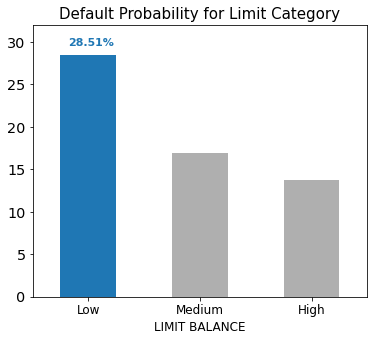

In [ ]:
df_limit.plot(x = "limit_cat", y = "default", kind = "bar",figsize = (6,5), color = ["#1f77b4","#afafaf","#afafaf"], legend = None, ylim = (0,32))
plt.xticks(rotation = 0, fontsize = 12)
plt.xlabel("LIMIT BALANCE", fontsize = 12)
plt.text(-0.185, 29.5, s='28.51%',fontsize=11,color="#1f77b4",weight="bold")
plt.title("Default Probability for Limit Category", fontsize = 15)
plt.show()

Berdasarkan kategori limit, mayoritas nasabah yang default memiliki limit kartu kredit di bawah <b>NTD 200000</b> (kategori low).

### Default Percentage untuk Masing-masing Gender

In [ ]:
df_sex = df1.groupby(["SEX","default_payment_next_month"])["ID"].count().reset_index()

df_sex = pd.pivot_table(df_sex, index = ["SEX"], columns = ["default_payment_next_month"], values = ["ID"])
df_sex = df_sex.reset_index()
df_sex.columns = ['SEX','NON DEFAULT','DEFAULT']

df_sex["total"] = df_sex["NON DEFAULT"] + df_sex["DEFAULT"]
df_sex["default"] = round(df_sex["DEFAULT"] / df_sex["total"] * 100,2)        # default percentage per sex
df_sex["nondefault"] = round(df_sex["NON DEFAULT"] / df_sex["total"] * 100,2) # nondefault percentage per sex
df_sex["dp_per_total_default"] = df_sex["DEFAULT"] / 4645 * 100
df_sex["dp_per_all"] = df_sex["DEFAULT"] / 21000 * 100

df_sex

,SEX,NON DEFAULT,DEFAULT,total,default,nondefault,dp_per_total_default,dp_per_all
0,Female,10097,2662,12759,20.86,79.14,57.308934,12.676190
1,Male,6258,1983,8241,24.06,75.94,42.691066,9.442857


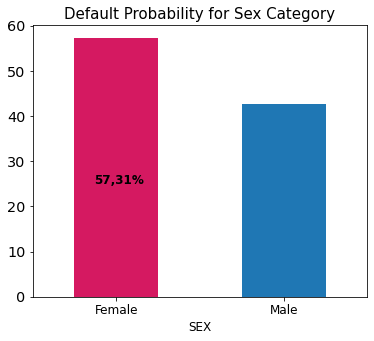

In [ ]:
df_sex.plot(x = "SEX", y = "dp_per_total_default",kind = "bar",figsize = (6,5), color = ["#d51961","#1f77b4"],legend = None)
plt.xlabel("SEX",fontsize = 12)
plt.xticks(rotation = 0, fontsize = 12)
plt.title("Default Probability for Sex Category", fontsize = 15)
plt.text(-0.13, 25, s='57,31%',fontsize=12,color="black",weight="bold")
plt.show()

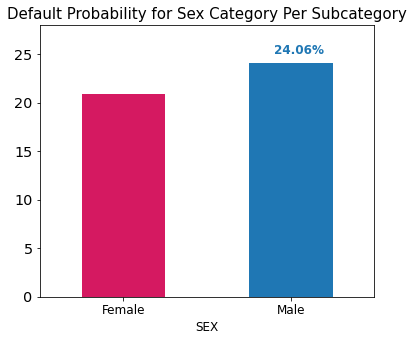

In [ ]:
df_sex.plot(x = "SEX", y = "default",kind = "bar",figsize = (6,5), ylim = (0,28), color = ["#d51961","#1f77b4"],legend = None)
plt.xticks([0,1],["Female","Male"],rotation = 0, fontsize = 12)
plt.xlabel("SEX",fontsize = 12)
plt.title("Default Probability for Sex Category Per Subcategory", fontsize = 15)
plt.text(0.9, 25, s='24.06%',fontsize=12,color="#1f77b4",weight="bold")
plt.show()

Berdasarkan jenis kelamin, mayoritas nasabah yang default adalah perempuan yaitu sebanyak  57,31% (2662 orang) dari total nasabah yang default.

Berdasarkan rasio per subcategory, 24,06% dari nasabah laki-laki mengalami default.

### Default Percentage untuk Masing-masing Kategori Pendidikan

In [ ]:
df1['EDUCATION'] = df1['EDUCATION'].replace(1, "Graduate School")
df1['EDUCATION'] = df1['EDUCATION'].replace(2, "University")
df1['EDUCATION'] = df1['EDUCATION'].replace(3, "High School")
df1['EDUCATION'] = df1['EDUCATION'].replace(4, "Others")
df1['EDUCATION'] = df1['EDUCATION'].replace(5, "Others")
df1['EDUCATION'] = df1['EDUCATION'].replace(6, "Others")
df1['EDUCATION'] = df1['EDUCATION'].replace(0, "Others")

In [ ]:
df_edu = df1.groupby(["EDUCATION","default_payment_next_month"])["ID"].count().reset_index()

df_edu = pd.pivot_table(df_edu, index = ["EDUCATION"], columns = ["default_payment_next_month"], values = ["ID"])
df_edu = df_edu.reset_index()
df_edu.columns = ['EDUCATION','NON DEFAULT','DEFAULT']

df_edu["total"] = df_edu["NON DEFAULT"] + df_edu["DEFAULT"]
df_edu["default"] = round(df_edu["DEFAULT"] / df_edu["total"] * 100,2)  # dp_per_education
df_edu["nondefault"] = round(df_edu["NON DEFAULT"] / df_edu["total"] * 100,2)  # ndp_per_education
df_edu["dp_per_total_default"] = round(df_edu["DEFAULT"] / 4645 * 100,2)
df_edu["dp_per_all"] = df_edu["DEFAULT"] / 21000 * 100

df_edu = df_edu.sort_values("default", ascending = False)
df_edu

,EDUCATION,NON DEFAULT,DEFAULT,total,default,nondefault,dp_per_total_default,dp_per_all
1,High_School,2618,849,3467,24.49,75.51,18.28,4.042857
3,University,7444,2345,9789,23.96,76.04,50.48,11.166667
0,Graduate_School,5982,1433,7415,19.33,80.67,30.85,6.823810
2,Others,311,18,329,5.47,94.53,0.39,0.085714


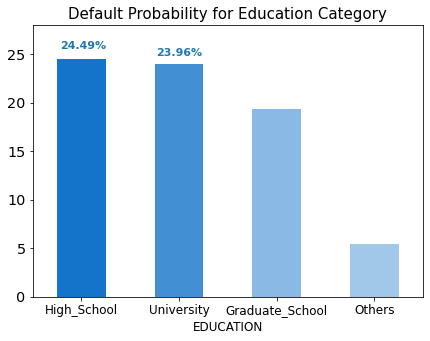

In [ ]:
df_edu.plot(x = "EDUCATION", y = "default", kind = "bar",figsize = (7,5), color = ["#1474ca","#428fd4","#89b9e4","#a1c7e9"], legend = None, ylim = (0,28))
plt.xticks(rotation = 0, fontsize = 12)
plt.xlabel("EDUCATION", fontsize = 12)
# plt.axhline(y=24.49, color='red', ls='--', lw=1.5)
plt.text(-0.22, 25.5, s='24.49%',fontsize=11,color="#1f77b4",weight = "bold")
plt.text(0.77, 24.8, s='23.96%',fontsize=11,color="#1f77b4",weight = "bold")
plt.title("Default Probability for Education Category", fontsize = 15)
plt.show()

Berdasarkan kategori pendidikan, mayoritas nasabah yang default adalah lulusan High School dan  universitas.

## Default Percentage untuk Masing-masing Status Pernikahan

In [ ]:
df['MARRIAGE'] = df['MARRIAGE'].replace(1, "Married")
df['MARRIAGE'] = df['MARRIAGE'].replace(2, "Single")
df['MARRIAGE'] = df['MARRIAGE'].replace(3, "Divorced")
df['MARRIAGE'] = df['MARRIAGE'].replace(0, "Unknown")

In [ ]:
df_marriage = df.groupby(["MARRIAGE","default_payment_next_month"])["ID"].count().reset_index()

df_marriage = pd.pivot_table(df_marriage, index = ["MARRIAGE"], columns = ["default_payment_next_month"], values = ["ID"])
df_marriage = df_marriage.reset_index()
df_marriage.columns = ['MARRIAGE','NON DEFAULT','DEFAULT']

df_marriage["total"] = df_marriage["NON DEFAULT"] + df_marriage["DEFAULT"]
df_marriage["default"] = round(df_marriage["DEFAULT"] / df_marriage["total"] * 100,2)         # dp_per_marriage
df_marriage["nondefault"] = round(df_marriage["NON DEFAULT"] / df_marriage["total"] * 100,2)  # ndp_per_marriage
df_marriage["dp_per_total_default"] = round(df_marriage["DEFAULT"] / 4645 * 100,2)
df_marriage["dp_per_all"] = df_marriage["DEFAULT"] / 21000 * 100

df_marriage

,MARRIAGE,NON DEFAULT,DEFAULT,total,default,nondefault,dp_per_total_default,dp_per_all
0,Divorced,156,63,219,28.77,71.23,1.36,0.300000
1,Married,7343,2218,9561,23.20,76.80,47.75,10.561905
2,Single,8822,2362,11184,21.12,78.88,50.85,11.247619
3,Unknown,34,2,36,5.56,94.44,0.04,0.009524


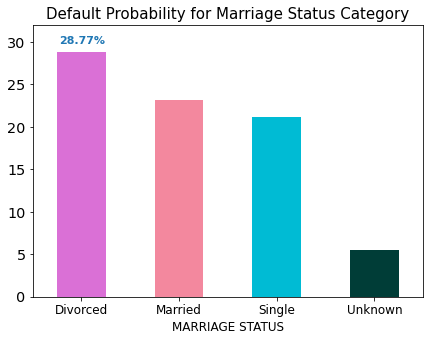

In [ ]:
df_marriage.plot(x = "MARRIAGE", y = "default", kind = "bar",figsize = (7,5), legend = None, ylim = (0,32),color = ["#DA70D6","#F3889E","#00bbd4","#003d37"])
plt.xticks(rotation = 0, fontsize = 12)
plt.xlabel("MARRIAGE STATUS", fontsize = 12)
plt.text(-0.23, 29.8, s='28.77%',fontsize=11,color="#1f77b4", weight="bold")
plt.title("Default Probability for Marriage Status Category", fontsize = 15)
plt.show()

Berdasarkan status pernikahan, diposisi pertama ada Divorced dengan persentase 28.77% dan disusul oleh Married dan Single

### Hubungan Status Pernikahan dan Limit Kartu Kredit

In [ ]:
df_marriage1 = round(df1.groupby("MARRIAGE").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),2)
df_marriage1.columns = ["marriage", "mean_limit", "median_limit"]
df_marriage1

,marriage,mean_limit,median_limit
0,Divorced,96255.71,50000.0
1,Married,182155.84,160000.0
2,Single,155943.10,130000.0
3,Unknown,132500.00,115000.0


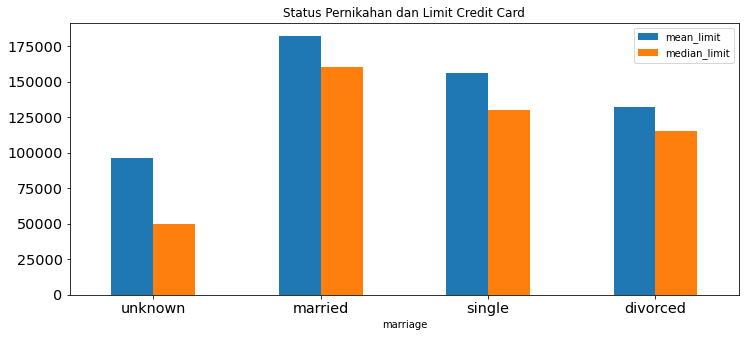

In [ ]:
df_marriage1.plot(x = "marriage", kind = "bar")
plt.xticks([0,1,2,3],["unknown","married","single","divorced"],rotation = 0)
plt.title("Status Pernikahan dan Limit Credit Card")
plt.show()

Nasabah yang memiliki limit kartu kredit paling tinggi adalah nasabah yang sudah menikah. Hal ini masuk akal mengingat bertambahnya kebutuhan hidup setelah menikah.

### Hubungan Pendidikan dan Limit Kartu Kredit

In [ ]:
# Menghitung mean dan median limit untuk masing-masing kategori pendidikan
df_edu1 = round(df1.groupby("EDUCATION").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),2)
df_edu1.columns = ["EDUCATION", "mean_limit", "median_limit"]

df_edu1['EDUCATION'] = df_edu1['EDUCATION'].replace("Graduate_School", 1)
df_edu1['EDUCATION'] = df_edu1['EDUCATION'].replace("University", 2)
df_edu1['EDUCATION'] = df_edu1['EDUCATION'].replace("High_School", 3)
df_edu1['EDUCATION'] = df_edu1['EDUCATION'].replace("Others", 4)

df_edu1 = df_edu1.sort_values("EDUCATION",ascending = True)
df_edu1 = df_edu1.reset_index()
df_edu1.drop(["index"],axis = 1)

,EDUCATION,mean_limit,median_limit
0,1,212024.28,200000.0
1,2,147140.26,110000.0
2,3,126653.50,80000.0
3,4,182024.32,170000.0


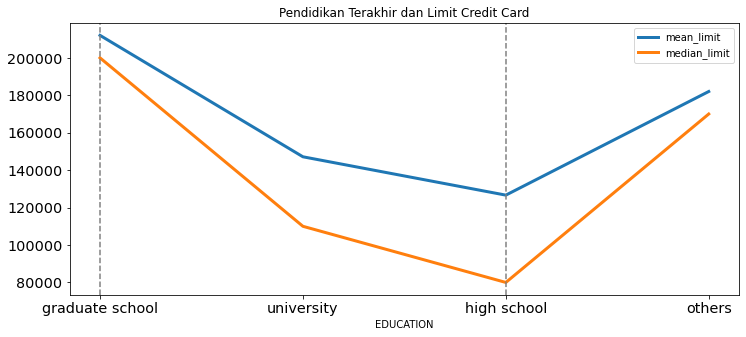

In [ ]:
df_edu1.plot(x = "EDUCATION", y = ["mean_limit","median_limit"],kind = "line")
plt.xticks([1,2,3,4],["graduate school","university","high school","others"],rotation = 0)
plt.legend(loc = 1)
plt.axvline(x=1, color='gray', ls='--', lw=1.5)
plt.axvline(x=3, color='gray', ls='--', lw=1.5)
plt.title("Pendidikan Terakhir dan Limit Credit Card")
plt.show()

Semakin rendah tingkat pendidikan terakhir nasabah bank, semakin rendah juga limit kartu kredit nasabah tersebut.

### Hubungan Usia dan Limit Kartu Kredit

In [ ]:
df_age1 = round(df1.groupby("age_cat").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),1)
df_age1.columns = ["age_cat", "mean_limit", "median_limit"]
df_age1

,age_cat,mean_limit,median_limit
0,Middle-Aged Adults,191575.1,180000.0
1,Senior Adults,165543.1,130000.0
2,Senior Citizen,201808.5,185000.0
3,Young Adults,154733.5,130000.0


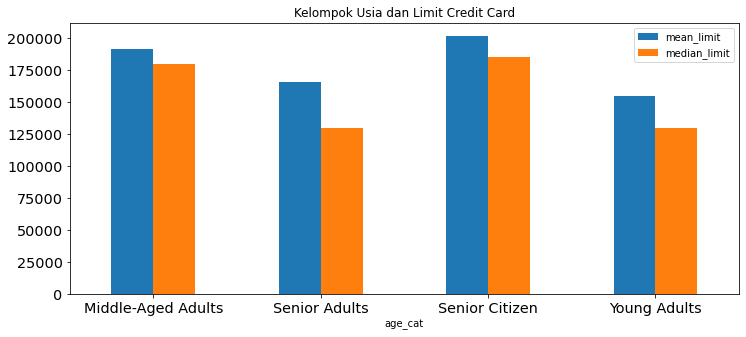

In [ ]:
df_age1.plot(x = "age_cat", kind = "bar")
plt.xticks(rotation = 0)
plt.title("Kelompok Usia dan Limit Credit Card")
plt.show()

Nasabah dengan kategori umur  Senior Citizen  memiliki limit paling tinggi diantara nasabah yang lainnya. Urutan kedua adalah Middle-Aged Adults. Sementara urutan ketiga adalah Senoir Adylts dan Young Adults.

### Hubungan Jenis Kelamin dan Limit Kartu Kredit

In [ ]:
df_sex1 = round(df1.groupby("SEX").agg({"LIMIT_BAL" : ["mean","median"]}).reset_index(),1)
df_sex1.columns = ["SEX", "mean_limit", "median_limit"]
df_sex1

,SEX,mean_limit,median_limit
0,Female,170291.2,150000.0
1,Male,162451.6,130000.0


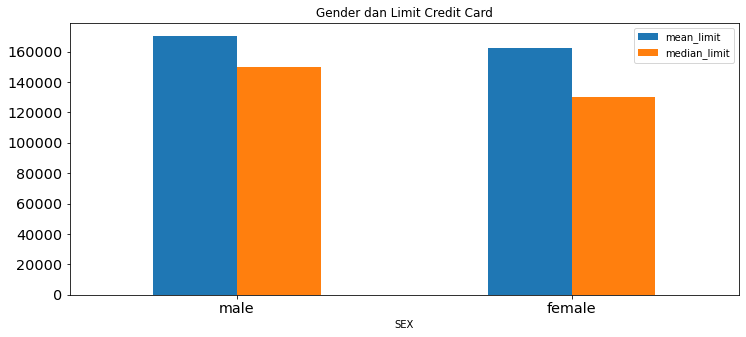

In [ ]:
df_sex1.plot(x = "SEX", kind = "bar")
plt.xticks([0,1],["male","female"],rotation = 0)
plt.title("Gender dan Limit Credit Card")
plt.show()

Dilihat dari nilai rata-rata limit credit card male lebih tinggi dibandingkan female

# Business Insight
1. Dari 21000 nasabah, sebanyak 4645 nasabah mengalami default payment pada tagihan kartu kreditnya. Meskipun nasabah yang mengalami default ini lebih sedikit jumlahnya daripada yang tidak mengalami default, default rate yang diperoleh yaitu sebesar 22% melebihi batas maksimum default rate bank secara umum di Taiwan.

2. Dari total 4645 nasabah yang default, 57,31% adalah nasabah wanita. Lebih lanjut, dilihat dari mean dan mediannya, nasabah wanita memiliki limit yang lebih tinggi daripada nasabah laki-laki.

3. Nasabah yang cenderung memiliki potensi default yang tinggi berusia di rentang 25 tahun sampai 30 tahun.

4. Berdasarkan status pernikahannya, 50.85% dari nasabah yang default memiliki status single dan di posisi kedua, 47.75% dari nasabah yang default memiliki status married.

5. Semakin besar limit kartu kredit nasabah, semakin sedikit nasabah yang mengalami default. 75% dari nasabah yang default memiliki limit kartu kredit yang rendah yaitu kurang dari NTD 200000.

6. Semakin rendah tingkat pendidikan terakhir nasabah , semakin rendah juga limit credit nasabah tersebut.

##Rekomendasi Bisnis <br>
1. Memberikan kemudahan untuk mengajukan peningkatan limit kepada pemegang kartu kredit yang melakukan payment tepat waktu.

2. Nasabah yang terdeteksi berpotensi akan gagal bayar segera dihubungi lebih dulu dan ditawarkan solusi.


## Rekomendasi Pre-Processing

1. Kolom ID akan di drop karena merupakan identifier dari tiap baris yang nilainya unik dan tidak dapat memberikan informasi apa-apa dalam analisis.
2. Merubah kolom PAY_0 menjadi PAY_1
3. Terdapat nilai yang belum terdefinisi pada kolom EDUCATION akan diubah menjadi unknown
4. Terdapat nilai minus pada kolom BILL_AMT1 - BILL_AMT6 hal itu wajar terjadi tetapi nilai tersebut akan di drop karena outlier
5. Pada visualisasi boxplot terdapat banyak outlier di kolom PAY_AMT1 - PAY_AMT 6 dan BILL_AMT1-BILL_AMT6, untuk penanganannya akan memfilter outlier dengan menggunakan z-score , kemudian akan dicek distribusi datanya setelah difilter
6. Melakukan sedikit experiment perbandingan antara z-score dengan IQR untuk pengematan perbandingan hasil akurasinya
7. Kolom PAY, BILL_AMT,PAY_AMT memiliki hubungan sebab akibat,kita akan memilih salah satu nya atau akan kami pertimbangkan lebih lanjut untuk tidak drop kolom tersebut sebagai bahan pertimbangan akurasi model kedepannya


# Stage 2 - Data Pre-Processing

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/dataset/train_20D8GL3.csv')

### Mengubah nama kolom PAY_0 menjadi PAY_1

In [ ]:
df.rename(columns = {'PAY_0': 'PAY_1'},inplace = True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21000 entries, 0 to 20999
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   ID                          21000 non-null  int64
 1   LIMIT_BAL                   21000 non-null  int64
 2   SEX                         21000 non-null  int64
 3   EDUCATION                   21000 non-null  int64
 4   MARRIAGE                    21000 non-null  int64
 5   AGE                         21000 non-null  int64
 6   PAY_1                       21000 non-null  int64
 7   PAY_2                       21000 non-null  int64
 8   PAY_3                       21000 non-null  int64
 9   PAY_4                       21000 non-null  int64
 10  PAY_5                       21000 non-null  int64
 11  PAY_6                       21000 non-null  int64
 12  BILL_AMT1                   21000 non-null  int64
 13  BILL_AMT2                   21000 non-null  int64
 14  BILL_A

## Encoding

In [ ]:
# Mengubah tipe data untuk kolom MARRIAGE
df['MARRIAGE'] = df['MARRIAGE'].replace(1, "Married")
df['MARRIAGE'] = df['MARRIAGE'].replace(2, "Single")
df['MARRIAGE'] = df['MARRIAGE'].replace(3, "Divorced")
df['MARRIAGE'] = df['MARRIAGE'].replace(0, "Unknown")

In [ ]:
OHC = pd.get_dummies(df['MARRIAGE'], prefix = 'status')
df = df.join(OHC)

In [ ]:
for i in ['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'] :
    OHC = pd.get_dummies(df[i], prefix = i)
    df = df.join(OHC)

In [ ]:
df.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,25150,360000,2,2,Single,25,-1,-1,-1,-1,...,0,1,0,0,0,0,0,0,0,0
1,13470,240000,2,1,Single,46,2,2,-2,-1,...,0,1,0,0,0,0,0,0,0,0


##Split Data Train & Test

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df, test_size=0.3, random_state=42)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14700 entries, 16485 to 15795
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          14700 non-null  int64 
 1   LIMIT_BAL                   14700 non-null  int64 
 2   SEX                         14700 non-null  int64 
 3   EDUCATION                   14700 non-null  int64 
 4   MARRIAGE                    14700 non-null  object
 5   AGE                         14700 non-null  int64 
 6   PAY_1                       14700 non-null  int64 
 7   PAY_2                       14700 non-null  int64 
 8   PAY_3                       14700 non-null  int64 
 9   PAY_4                       14700 non-null  int64 
 10  PAY_5                       14700 non-null  int64 
 11  PAY_6                       14700 non-null  int64 
 12  BILL_AMT1                   14700 non-null  int64 
 13  BILL_AMT2                   14700 non-null

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 2312 to 19750
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   ID                          6300 non-null   int64 
 1   LIMIT_BAL                   6300 non-null   int64 
 2   SEX                         6300 non-null   int64 
 3   EDUCATION                   6300 non-null   int64 
 4   MARRIAGE                    6300 non-null   object
 5   AGE                         6300 non-null   int64 
 6   PAY_1                       6300 non-null   int64 
 7   PAY_2                       6300 non-null   int64 
 8   PAY_3                       6300 non-null   int64 
 9   PAY_4                       6300 non-null   int64 
 10  PAY_5                       6300 non-null   int64 
 11  PAY_6                       6300 non-null   int64 
 12  BILL_AMT1                   6300 non-null   int64 
 13  BILL_AMT2                   6300 non-null   

In [ ]:
# Data kategorikal
category =['SEX','EDUCATION','MARRIAGE']
pay_delay = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Data numerikal
nums = ['LIMIT_BAL', 'AGE',
        'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
        'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

lim_age = ['LIMIT_BAL','AGE']

bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

## Handling Outlier

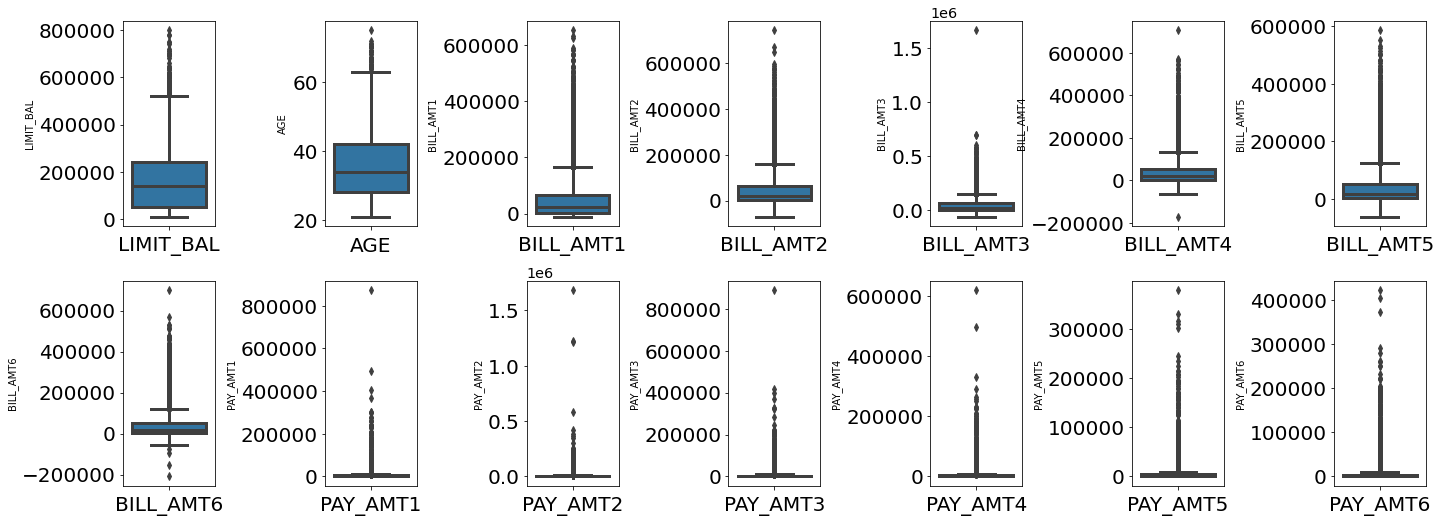

In [ ]:
#sebelum handling outlier
plt.figure(figsize=(20,25))
for i in range(len(nums)):
    plt.subplot(len(nums)//2, 7,i+1)
    ax =sns.boxplot(
        y = train[nums[i]]
    )
    ax.set_xlabel(str(nums[i]), fontsize = 20)
    ax.tick_params(labelsize = 20)
plt.tight_layout()
plt.show()

### Z-Score

In [ ]:
from scipy import stats
# Menghapus outlier berdasarkan Z-score
filter = np.array([True] * len(train))

for x in nums:
    zscore = abs(stats.zscore(train[x]))
    filter = (zscore < 3) & filter

train_zscore = train[filter]
print('Jumlah baris sebelum outliers :',len(train))
print('Jumlah baris sesudah outliers :',len(train_zscore))
print('percent of outlier: ', train_zscore.shape[0]/train.shape[0] * 100, '%')

Jumlah baris sebelum outliers : 14700
Jumlah baris sesudah outliers : 13263
percent of outlier:  90.22448979591837 %


=========================================================== Visualisasi Setelah Menggunakan ZSCORE ===========================================================


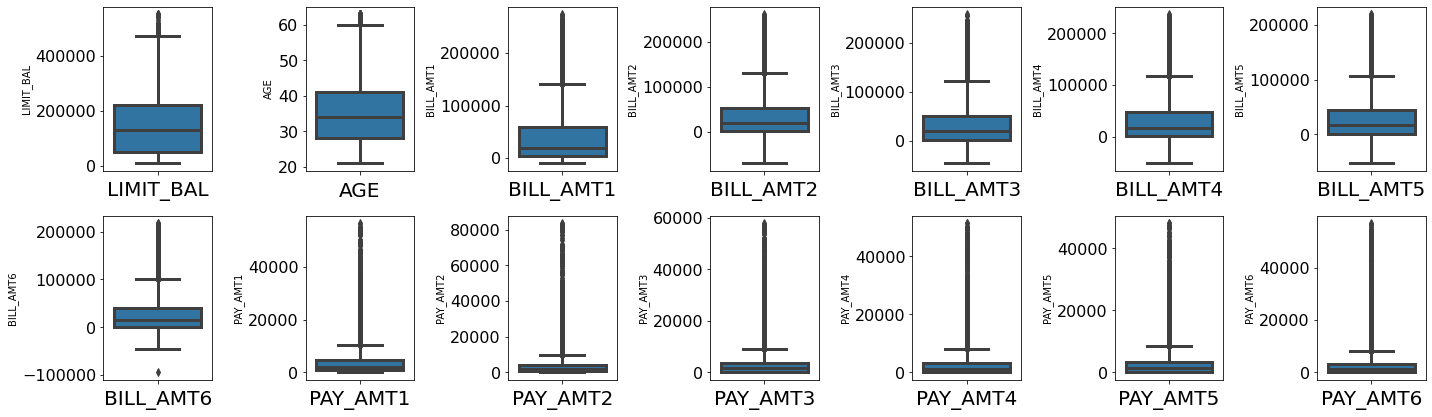

In [ ]:
print('=========================================================== Visualisasi Setelah Menggunakan ZSCORE ===========================================================')

plt.figure(figsize=(20, 20))
for i in range(len(nums)):
    plt.subplot(len(nums)//2, 7, i+1)
    ax = sns.boxplot(
        y = train_zscore[nums[i]]
        )
    ax.set_xlabel(str(nums[i]), fontsize = 20)
    ax.tick_params(labelsize=16)
plt.tight_layout()
plt.show()

## Transformation

In [ ]:
from scipy.sparse import issparse
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.preprocessing import RobustScaler

## Distribusi Data Sebelum Feature Transformation



###BILL_AMT

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

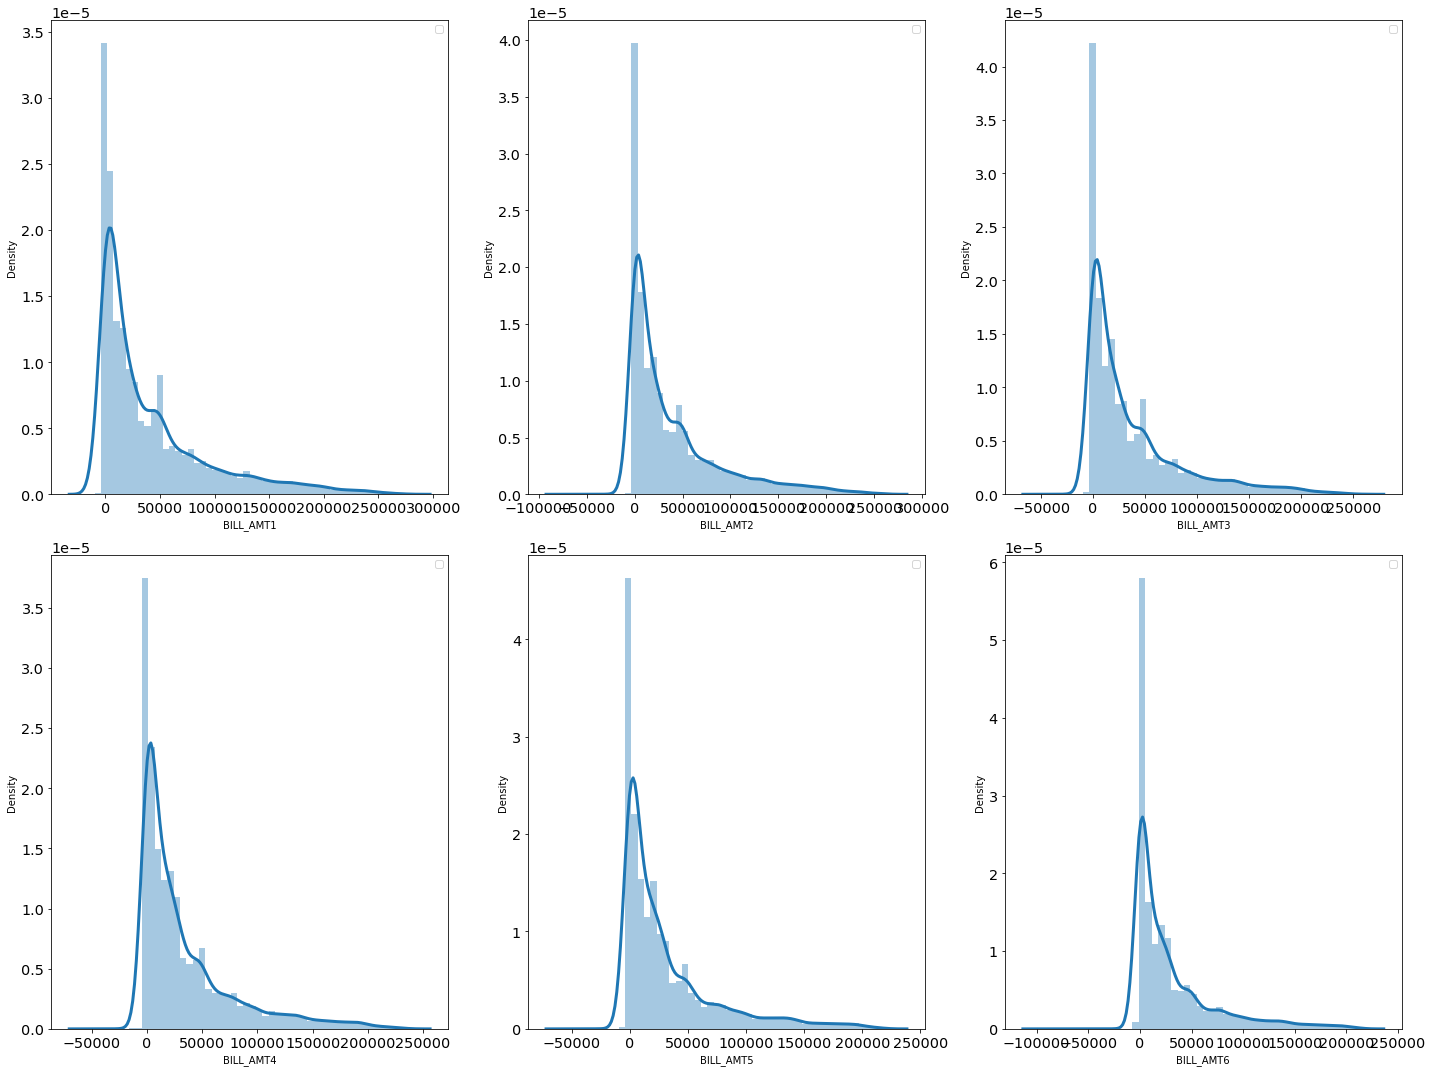

In [ ]:
#BILL_AMT
a = plt.figure(figsize=(20,15))

for i, j in enumerate(bill_amt):
    a.add_subplot(2, 3, i+1)
    sns.distplot(train_zscore[j])
    plt.legend()
    a.tight_layout()

### PAY_AMT

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function 

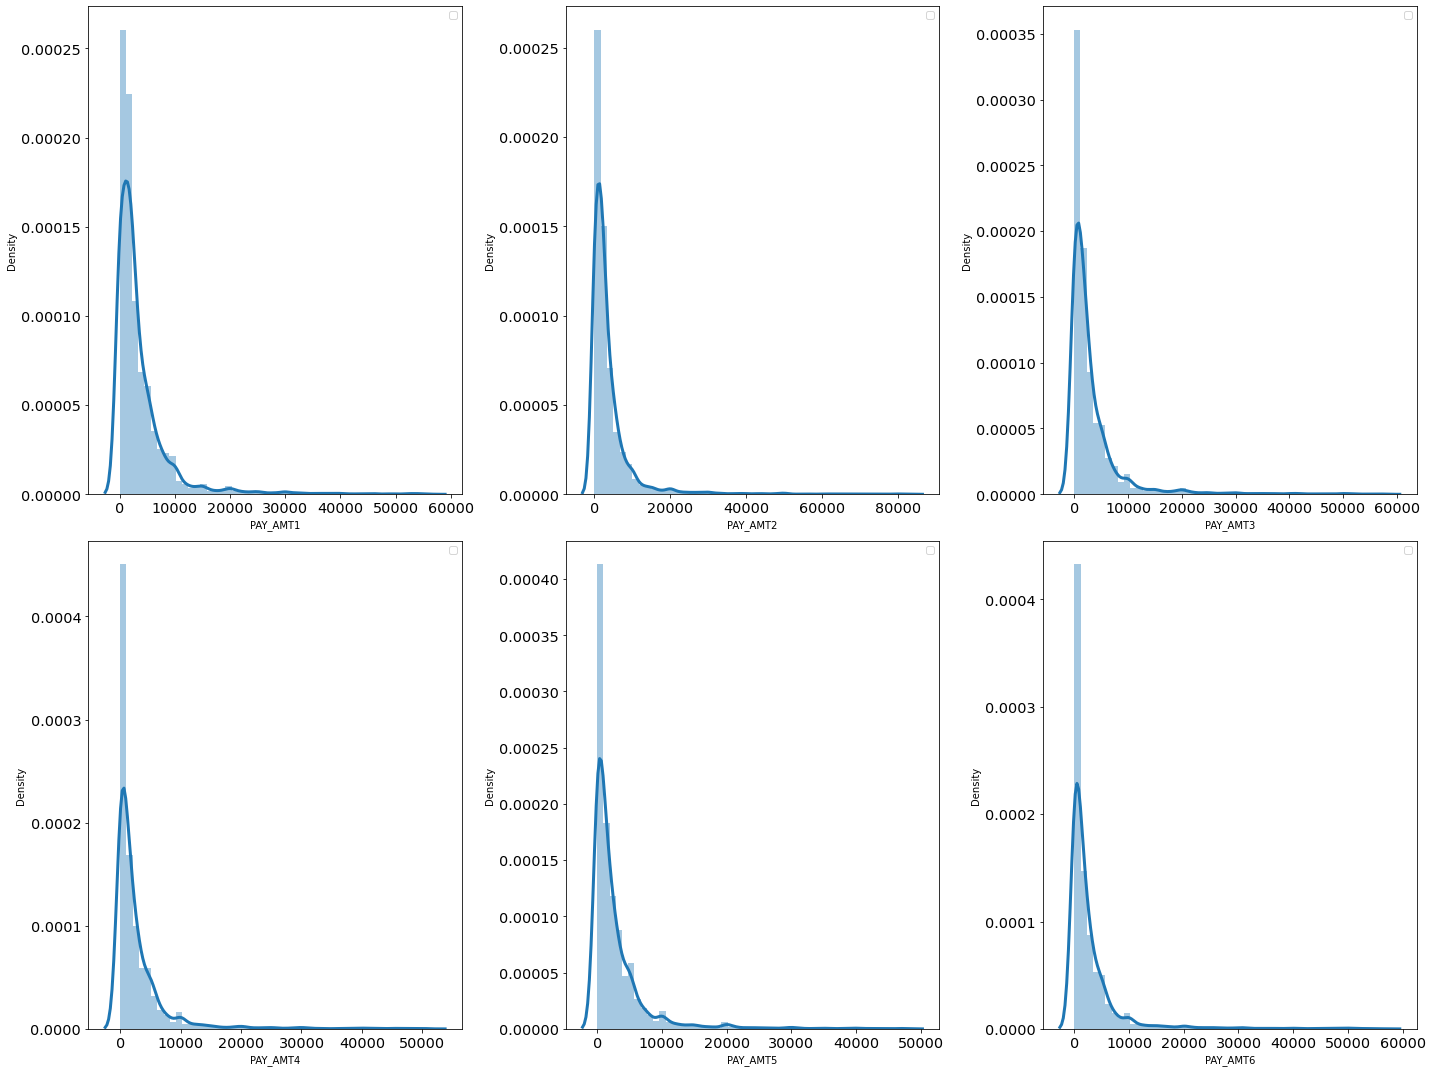

In [ ]:
#PAY_AMT
a = plt.figure(figsize=(20,15))

for i, j in enumerate(pay_amt):
    a.add_subplot(2, 3, i+1)
    sns.distplot(train_zscore[j])
    plt.legend()
    a.tight_layout()

###LIMIT_BALL & AGE

/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/usr/local/lib/python3.8/dist-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


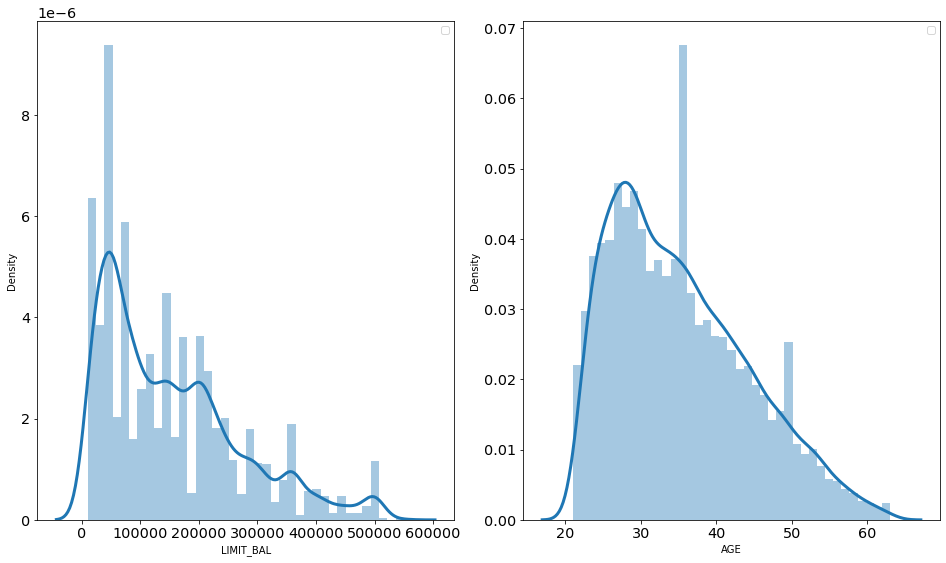

In [ ]:
a = plt.figure(figsize=(20,15))

for i, j in enumerate(nums1):
    a.add_subplot(2, 3, i+1)
    sns.distplot(train_zscore[j])
    plt.legend()
    a.tight_layout()

## Skewness

### Sebelum Handling Outlier

In [ ]:
print(df[bill_amt].skew())
print()
print(df[pay_amt].skew())
print()

BILL_AMT1    2.598670
BILL_AMT2    2.619080
BILL_AMT3    3.197614
BILL_AMT4    2.758931
BILL_AMT5    2.742799
BILL_AMT6    2.752125
dtype: float64

PAY_AMT1    15.601438
PAY_AMT2    33.376650
PAY_AMT3    15.703325
PAY_AMT4    12.691997
PAY_AMT5    11.139769
PAY_AMT6    10.477613
dtype: float64



### Sesudah Handling Outlier

In [ ]:
print(train_zscore[bill_amt].skew())
print()
print(train_zscore[pay_amt].skew())
print()

BILL_AMT1    1.707639
BILL_AMT2    1.729645
BILL_AMT3    1.768924
BILL_AMT4    1.837581
BILL_AMT5    1.913491
BILL_AMT6    1.949427
dtype: float64

PAY_AMT1    4.138778
PAY_AMT2    5.449808
PAY_AMT3    4.505349
PAY_AMT4    4.553814
PAY_AMT5    4.113901
PAY_AMT6    4.746647
dtype: float64



## Proses Scaling

###Scaling Data Train

In [ ]:
#Scaling Train LIMIT_BILL dan AGE
scaler = StandardScaler()
train_zscore[lim_age] = scaler.fit_transform(train_zscore[lim_age])
train_zscore[lim_age].describe()

,LIMIT_BAL,AGE
count,1.326300e+04,1.326300e+04
mean,6.241290e-17,3.557267e-16
std,1.000038e+00,1.000038e+00
min,-1.207970e+00,-1.570689e+00
25%,-8.701590e-01,-7.977619e-01
50%,-1.945363e-01,-1.352525e-01
75%,5.655391e-01,6.376750e-01
max,3.352483e+00,3.066876e+00


In [ ]:
#Scaling BILL_AMT
train_zscore[bill_amt] = scaler.fit_transform(train_zscore[bill_amt])
train_zscore[bill_amt].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,1.326300e+04,1.326300e+04,1.326300e+04,1.326300e+04,1.326300e+04,1.326300e+04
mean,5.370724e-17,-8.571729e-17,5.518050e-17,3.160825e-17,-1.714346e-17,-4.768024e-17
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-9.884647e-01,-2.187314e+00,-1.754849e+00,-1.911493e+00,-1.998433e+00,-3.005939e+00
25%,-7.390623e-01,-7.392433e-01,-7.342975e-01,-7.254459e-01,-7.119131e-01,-7.036471e-01
50%,-4.135350e-01,-4.021058e-01,-3.895543e-01,-3.650629e-01,-3.623083e-01,-3.755809e-01
75%,3.230853e-01,2.857984e-01,2.804144e-01,3.122607e-01,2.877585e-01,2.642705e-01
max,4.472675e+00,4.446220e+00,4.643833e+00,4.570570e+00,4.444186e+00,4.510815e+00


In [ ]:
#Scaling PAY_AMT
train_zscore[pay_amt] = scaler.fit_transform(train_zscore[pay_amt])
train_zscore[pay_amt].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,1.326300e+04,1.326300e+04,1.326300e+04,1.326300e+04,1.326300e+04,1.326300e+04
mean,2.330439e-17,-1.312546e-17,4.285864e-17,4.660877e-17,-1.607199e-17,8.035996e-18
std,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00
min,-6.522575e-01,-5.534036e-01,-5.644893e-01,-5.429547e-01,-5.837609e-01,-5.147150e-01
25%,-5.252140e-01,-4.630157e-01,-5.094190e-01,-5.157957e-01,-5.597503e-01,-5.147150e-01
50%,-3.058541e-01,-2.673659e-01,-2.942060e-01,-3.153627e-01,-3.252003e-01,-3.108277e-01
75%,1.466353e-01,5.900313e-02,7.743349e-02,5.798243e-02,9.597771e-02,3.544092e-02
max,9.114239e+00,1.137465e+01,9.205575e+00,8.742692e+00,8.941113e+00,9.142578e+00


In [ ]:
train_zscore.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13263 entries, 16485 to 15795
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          13263 non-null  int64  
 1   LIMIT_BAL                   13263 non-null  float64
 2   SEX                         13263 non-null  int64  
 3   EDUCATION                   13263 non-null  int64  
 4   MARRIAGE                    13263 non-null  object 
 5   AGE                         13263 non-null  float64
 6   PAY_1                       13263 non-null  int64  
 7   PAY_2                       13263 non-null  int64  
 8   PAY_3                       13263 non-null  int64  
 9   PAY_4                       13263 non-null  int64  
 10  PAY_5                       13263 non-null  int64  
 11  PAY_6                       13263 non-null  int64  
 12  BILL_AMT1                   13263 non-null  float64
 13  BILL_AMT2                  

In [ ]:
train = train_zscore

### Scaling Data Test

In [ ]:
#Scaling Test Limit Bill dan Age
test[lim_age] = scaler.fit_transform(test[lim_age])
test[lim_age].describe()


,LIMIT_BAL,AGE
count,6.300000e+03,6.300000e+03
mean,-1.578984e-17,-1.263187e-16
std,1.000079e+00,1.000079e+00
min,-1.208998e+00,-1.565105e+00
25%,-8.967841e-01,-8.020864e-01
50%,-1.943034e-01,-1.480706e-01
75%,5.862307e-01,6.149479e-01
max,4.957222e+00,4.321038e+00


In [ ]:
#Scaling BILL_AMT
test[bill_amt] = scaler.fit_transform(test[bill_amt])
test[bill_amt].describe()

,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6
count,6.300000e+03,6.300000e+03,6.300000e+03,6.300000e+03,6.300000e+03,6.300000e+03
mean,-1.353415e-17,-3.609106e-17,-3.947460e-17,-1.353415e-17,-3.834675e-17,1.240630e-17
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00
min,-9.038339e-01,-1.688676e+00,-3.010766e+00,-1.979584e+00,-2.049100e+00,-1.335727e+00
25%,-6.538836e-01,-6.632051e-01,-6.508035e-01,-6.462046e-01,-6.434132e-01,-6.430012e-01
50%,-3.913276e-01,-3.924920e-01,-3.916065e-01,-3.768171e-01,-3.657037e-01,-3.642394e-01
75%,2.367290e-01,2.333120e-01,2.215883e-01,2.036470e-01,1.736537e-01,1.824992e-01
max,9.663792e+00,8.083621e+00,9.483902e+00,9.157217e+00,8.597257e+00,7.918509e+00


In [ ]:
#Scaling PAY_AMT
test[pay_amt] = scaler.fit_transform(test[pay_amt])
test[pay_amt].describe()

,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6
count,6.300000e+03,6.300000e+03,6.300000e+03,6.300000e+03,6.300000e+03,6.300000e+03
mean,-1.127846e-17,2.030122e-17,-4.511382e-18,-1.536690e-17,-1.635376e-17,-1.127846e-18
std,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00
min,-3.601533e-01,-3.184195e-01,-3.168514e-01,-3.136554e-01,-2.874694e-01,-2.758397e-01
25%,-2.959115e-01,-2.657191e-01,-2.916855e-01,-2.939119e-01,-2.755979e-01,-2.704991e-01
50%,-2.252133e-01,-2.059416e-01,-2.024613e-01,-2.155103e-01,-1.984331e-01,-1.957320e-01
75%,-3.894396e-02,-3.869326e-02,-3.669107e-02,-5.193507e-02,-5.003912e-02,-6.221928e-02
max,2.039087e+01,2.211579e+01,2.516493e+01,2.139526e+01,2.452340e+01,2.795762e+01


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 2312 to 19750
Data columns (total 92 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   ID                          6300 non-null   int64  
 1   LIMIT_BAL                   6300 non-null   float64
 2   SEX                         6300 non-null   int64  
 3   EDUCATION                   6300 non-null   int64  
 4   MARRIAGE                    6300 non-null   object 
 5   AGE                         6300 non-null   float64
 6   PAY_1                       6300 non-null   int64  
 7   PAY_2                       6300 non-null   int64  
 8   PAY_3                       6300 non-null   int64  
 9   PAY_4                       6300 non-null   int64  
 10  PAY_5                       6300 non-null   int64  
 11  PAY_6                       6300 non-null   int64  
 12  BILL_AMT1                   6300 non-null   float64
 13  BILL_AMT2                   6

In [ ]:
train = train.drop(columns = ['ID','MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])
test = test.drop(columns = ['ID','MARRIAGE','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13263 entries, 16485 to 15795
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   13263 non-null  float64
 1   SEX                         13263 non-null  int64  
 2   EDUCATION                   13263 non-null  int64  
 3   AGE                         13263 non-null  float64
 4   BILL_AMT1                   13263 non-null  float64
 5   BILL_AMT2                   13263 non-null  float64
 6   BILL_AMT3                   13263 non-null  float64
 7   BILL_AMT4                   13263 non-null  float64
 8   BILL_AMT5                   13263 non-null  float64
 9   BILL_AMT6                   13263 non-null  float64
 10  PAY_AMT1                    13263 non-null  float64
 11  PAY_AMT2                    13263 non-null  float64
 12  PAY_AMT3                    13263 non-null  float64
 13  PAY_AMT4                   

In [ ]:
train.describe()

,LIMIT_BAL,SEX,EDUCATION,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
count,1.326300e+04,13263.000000,13263.000000,1.326300e+04,1.326300e+04,1.326300e+04,1.326300e+04,1.326300e+04,1.326300e+04,1.326300e+04,...,13263.000000,13263.000000,13263.000000,13263.000000,13263.000000,13263.000000,13263.000000,13263.000000,13263.000000,13263.000000
mean,6.241290e-17,1.609817,1.866546,3.557267e-16,5.370724e-17,-8.571729e-17,5.518050e-17,3.160825e-17,-1.714346e-17,-4.768024e-17,...,0.172736,0.187213,0.533137,0.095001,0.007238,0.001583,0.000302,0.000829,0.001810,0.000151
std,1.000038e+00,0.487810,0.787369,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,1.000038e+00,...,0.378033,0.390097,0.498920,0.293228,0.084772,0.039761,0.017364,0.028788,0.042502,0.012279
min,-1.207970e+00,1.000000,0.000000,-1.570689e+00,-9.884647e-01,-2.187314e+00,-1.754849e+00,-1.911493e+00,-1.998433e+00,-3.005939e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-8.701590e-01,1.000000,1.000000,-7.977619e-01,-7.390623e-01,-7.392433e-01,-7.342975e-01,-7.254459e-01,-7.119131e-01,-7.036471e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-1.945363e-01,2.000000,2.000000,-1.352525e-01,-4.135350e-01,-4.021058e-01,-3.895543e-01,-3.650629e-01,-3.623083e-01,-3.755809e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.655391e-01,2.000000,2.000000,6.376750e-01,3.230853e-01,2.857984e-01,2.804144e-01,3.122607e-01,2.877585e-01,2.642705e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.352483e+00,2.000000,6.000000,3.066876e+00,4.472675e+00,4.446220e+00,4.643833e+00,4.570570e+00,4.444186e+00,4.510815e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 2312 to 19750
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   LIMIT_BAL                   6300 non-null   float64
 1   SEX                         6300 non-null   int64  
 2   EDUCATION                   6300 non-null   int64  
 3   AGE                         6300 non-null   float64
 4   BILL_AMT1                   6300 non-null   float64
 5   BILL_AMT2                   6300 non-null   float64
 6   BILL_AMT3                   6300 non-null   float64
 7   BILL_AMT4                   6300 non-null   float64
 8   BILL_AMT5                   6300 non-null   float64
 9   BILL_AMT6                   6300 non-null   float64
 10  PAY_AMT1                    6300 non-null   float64
 11  PAY_AMT2                    6300 non-null   float64
 12  PAY_AMT3                    6300 non-null   float64
 13  PAY_AMT4                    6

In [ ]:
test.describe()

,LIMIT_BAL,SEX,EDUCATION,AGE,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,...,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
count,6.300000e+03,6300.000000,6300.000000,6.300000e+03,6.300000e+03,6.300000e+03,6.300000e+03,6.300000e+03,6.300000e+03,6.300000e+03,...,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.000000,6300.0
mean,-1.578984e-17,1.610476,1.844444,-1.263187e-16,-1.353415e-17,-3.609106e-17,-3.947460e-17,-1.353415e-17,-3.834675e-17,1.240630e-17,...,0.160952,0.190000,0.542540,0.098095,0.004603,0.001270,0.000476,0.000476,0.001587,0.0
std,1.000079e+00,0.487681,0.783173,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,1.000079e+00,...,0.367516,0.392332,0.498227,0.297467,0.067696,0.035615,0.021818,0.021818,0.039812,0.0
min,-1.208998e+00,1.000000,0.000000,-1.565105e+00,-9.038339e-01,-1.688676e+00,-3.010766e+00,-1.979584e+00,-2.049100e+00,-1.335727e+00,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
25%,-8.967841e-01,1.000000,1.000000,-8.020864e-01,-6.538836e-01,-6.632051e-01,-6.508035e-01,-6.462046e-01,-6.434132e-01,-6.430012e-01,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
50%,-1.943034e-01,2.000000,2.000000,-1.480706e-01,-3.913276e-01,-3.924920e-01,-3.916065e-01,-3.768171e-01,-3.657037e-01,-3.642394e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
75%,5.862307e-01,2.000000,2.000000,6.149479e-01,2.367290e-01,2.333120e-01,2.215883e-01,2.036470e-01,1.736537e-01,1.824992e-01,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0
max,4.957222e+00,2.000000,6.000000,4.321038e+00,9.663792e+00,8.083621e+00,9.483902e+00,9.157217e+00,8.597257e+00,7.918509e+00,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.0


### Kesimpulan

Kami sudah melakukan beberapa percobaan/eksperimen menggunakan yeojohnson,log, log(x+1),findlog pada fitur PAY_AMT1 - PAY_AMT6 namun yang kami dapatkan dari percobaan tersebut adalah :
1. Menggunakan log tranform membuat nilainya menjadi -inf
2. Menggunakan log(x+1),findlog dan yejohnson setelah divisualisasikan plot distribusinya menjadi punuk unta

Untuk kolom LIMIT_BAL,AGE, dan BILL_AMT1 - BILL_AMT6 setelah handling outlier distribusi datanya sudah mendekati normal jadi kami hanya perlu melakukan StandardScaler <br>
Kami memutuskan untuk menggunakan StandardScaler karena nilai negatif pada kolom BILL_AMT wajar terjadi

# Stage 3 - Machine Learning Modelling & Evaluation

In [ ]:
#Memisahkan x,y
x_train = train.drop(['default_payment_next_month'],axis=1)
y_train = train['default_payment_next_month']

In [ ]:
x_test = test.drop(['default_payment_next_month'],axis=1)
y_test = test['default_payment_next_month']

In [ ]:
print(x_train.shape)
print(y_train.shape)

(13263, 83)
(13263,)


In [ ]:
print(x_test.shape)
print(y_test.shape)

(6300, 83)
(6300,)


In [ ]:
y_train.value_counts(normalize=True)

0    0.770716
1    0.229284
Name: default_payment_next_month, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)

0    0.776508
1    0.223492
Name: default_payment_next_month, dtype: float64

##Logistic Regression

In [ ]:
from sklearn.metrics import f1_score, roc_auc_score,recall_score,accuracy_score,confusion_matrix

In [ ]:
def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    y_pred_datatest = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred_datatest)
    tn, fp, fn, tp = cm.ravel()

    print("Accuracy (Test Set): ", accuracy_score(y_test, y_pred))
    print("F1-Score (Test Set): " , f1_score(y_test, y_pred))
    print("Recall (Test Set): " , recall_score(y_test, y_pred))
    print("roc_auc (test-proba): " , roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): " , roc_auc_score(y_train, y_pred_proba_train[:, 1]))
    print('TP  : {}\nFP  : {}\nFN  : {}\nTN  : {}\n'.format(tp, fp, fn, tn))


def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

In [ ]:
from sklearn.linear_model import LogisticRegression

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for c in param_values:
        model = LogisticRegression(penalty='l2', C=c)
        model.fit(x_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(c) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('C')
    plt.ylabel('AUC')
    plt.title('Learning Curve - Hyperparameter C - Logistic Regression')
    plt.legend()
    plt.show()

### FIT MODEL

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train, y_train)
eval_classification(logreg)

Accuracy (Test Set):  0.816031746031746
F1-Score (Test Set):  0.4656523743660672
Recall (Test Set):  0.3586647727272727
roc_auc (test-proba):  0.772974371422731
roc_auc (train-proba):  0.7754197975609023
TP  : 505
FP  : 256
FN  : 903
TN  : 4636



### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

In [ ]:
#dengan class_weight(jika data imbalance)
penalty = ['l1', 'l2']
C = [float(x) for x in np.linspace(0.0001, 1, 100)]
class_weight = 'balanced'
hyperparameters = dict(penalty=penalty, C=C,class_weight=class_weight)

logreg = LogisticRegression()
rs = RandomizedSearchCV(logreg, hyperparameters, scoring='roc_auc', random_state=42)
rs.fit(x_train, y_train)
eval_classification(rs)

Accuracy (Test Set):  0.8157142857142857
F1-Score (Test Set):  0.4612529002320186
Recall (Test Set):  0.35298295454545453
roc_auc (test-proba):  0.7735381106909239
roc_auc (train-proba):  0.7755604437135191
TP  : 497
FP  : 250
FN  : 911
TN  : 4642



param value: 0.0001; train: 0.751195878334258; test: 0.7545962970619935
param value: 0.010199999999999999; train: 0.7748003046604126; test: 0.7734588416617111
param value: 0.0203; train: 0.7754488468463124; test: 0.7738437174793726
param value: 0.0304; train: 0.7755736011417945; test: 0.7737901455530365
param value: 0.0405; train: 0.7755940289338603; test: 0.7737285886512302
param value: 0.0506; train: 0.7755777510397103; test: 0.7736536750631828
param value: 0.060700000000000004; train: 0.7755728934072663; test: 0.7735671469653609
param value: 0.0708; train: 0.7755604437135191; test: 0.7735381106909239
param value: 0.0809; train: 0.7755445840261358; test: 0.7734881682988924
param value: 0.091; train: 0.7755264724561624; test: 0.7734329993774622
param value: 0.1011; train: 0.7755054977783248; test: 0.7733923485932506
param value: 0.1112; train: 0.7754958468529395; test: 0.7733531496227607
param value: 0.1213; train: 0.7754897667699465; test: 0.7733203386326469
param value: 0.1314; trai

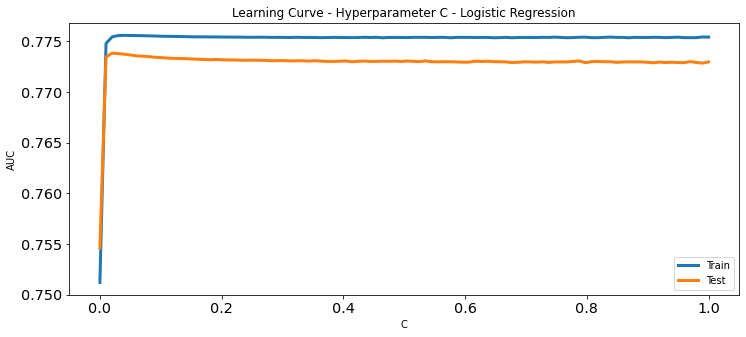

In [ ]:
# learning curve
param_values = [float(x) for x in np.linspace(0.0001, 1, 100)]
draw_learning_curve(param_values)

# kNN

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
def eval_classification(model):
    ypred_proba_test = model.predict_proba(x_test)
    ypred_proba_train = model.predict_proba(x_train)
    ypred_datatest = model.predict(x_test)
    ypred_datatrain = model.predict(x_train)

    cm = confusion_matrix(y_test, ypred_datatest)
    tn, fp, fn, tp = cm.ravel()

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, ypred_datatest))
    print("Precision (Test Set): %.2f" % precision_score(y_test, ypred_datatest))
    print("Recall (Test Set): %.2f" % recall_score(y_test, ypred_datatest))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, ypred_datatest))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, ypred_proba_test[:,1] ))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, ypred_proba_train[:,1] ))
    print('TP  : {}\nFP  : {}\nFN  : {}\nTN  : {}\n'.format(tp, fp, fn, tn))


In [ ]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
eval_classification(knn)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.57
Recall (Test Set): 0.35
F1-Score (Test Set): 0.43
AUC (test-proba): 0.70
AUC (train-proba): 0.88
TP  : 488
FP  : 371
FN  : 920
TN  : 4521



### Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
n_neighbors = [int(x) for x in np.linspace(1, 100, 100)]
weights = ['uniform','distance']
p=[1,2]
algorithm = ['auto', 'ball_tree', 'kd_tree', 'brute']
hyperparameters = dict( n_neighbors = n_neighbors,
                        weights = weights,
                        p = p,
                        algorithm = algorithm
                       )
knn.fit(x_train, y_train)
knn_model = RandomizedSearchCV(knn, hyperparameters, cv=5, random_state=1, scoring='roc_auc')
knn_model.fit(x_train, y_train)
eval_classification(knn_model)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.66
Recall (Test Set): 0.24
F1-Score (Test Set): 0.35
AUC (test-proba): 0.75
AUC (train-proba): 1.00
TP  : 340
FP  : 176
FN  : 1068
TN  : 4716



param value: 1; train: 0.9995244184818823; test: 0.608257684159667
param value: 2; train: 0.9482925614977875; test: 0.6516259732959191
param value: 3; train: 0.9193286867773508; test: 0.6742100971902176
param value: 4; train: 0.9000062473656995; test: 0.6870746185794989
param value: 5; train: 0.8837211632762215; test: 0.6981756218408534
param value: 6; train: 0.8728400666016795; test: 0.7022600819752101
param value: 7; train: 0.8637626957119201; test: 0.7112854271584405
param value: 8; train: 0.8568131125965102; test: 0.7123656491581802
param value: 9; train: 0.8497344644389457; test: 0.7172381537807552
param value: 10; train: 0.8432529351198527; test: 0.7220755245112614
param value: 11; train: 0.8368210437269918; test: 0.7263782648386976
param value: 12; train: 0.83306231390201; test: 0.7290736296039917
param value: 13; train: 0.8298009445167657; test: 0.7305660215193638
param value: 14; train: 0.826868623432537; test: 0.730476662384784
param value: 15; train: 0.8233050192339726; test

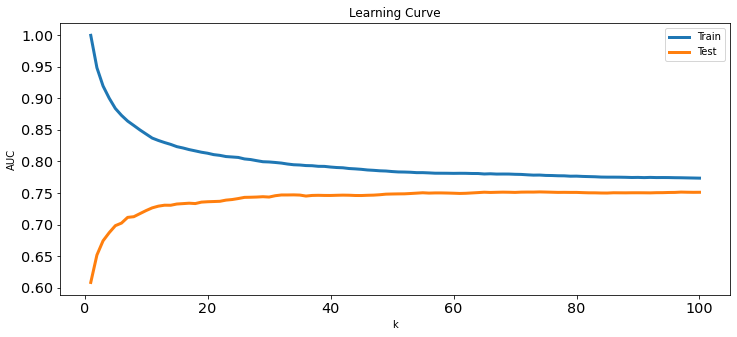

In [ ]:
# Analyzing Learning Curve
import numpy as np
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsClassifier

def draw_learning_curve(param_values):
    train_scores = []
    test_scores = []

    for i in param_values:
        model = KNeighborsClassifier(n_neighbors=i)
        model.fit(x_train, y_train)

        # eval on train
        y_pred_train_proba = model.predict_proba(x_train)
        train_auc = roc_auc_score(y_train, y_pred_train_proba[:,1])
        train_scores.append(train_auc)

        # eval on test
        y_pred_proba = model.predict_proba(x_test)
        test_auc = roc_auc_score(y_test, y_pred_proba[:,1])
        test_scores.append(test_auc)

        print('param value: ' + str(i) + '; train: ' + str(train_auc) + '; test: '+ str(test_auc))

    plt.plot(param_values, train_scores, label='Train')
    plt.plot(param_values, test_scores, label='Test')
    plt.xlabel('k')
    plt.ylabel('AUC')
    plt.title('Learning Curve')
    plt.legend()
    plt.show()

param_values = [int(x) for x in np.linspace(1, 100, 100)]
draw_learning_curve(param_values)

## Model Experiment : kNN

In [ ]:
df_ab = pd.read_csv('/content/gdrive/MyDrive/dataset/train_20D8GL3.csv')

In [ ]:
df_ab.rename(columns = {'PAY_0': 'PAY_1'},inplace = True)

In [ ]:
# Mengubah tipe data untuk kolom MARRIAGE
df_ab['MARRIAGE'] = df_ab['MARRIAGE'].replace(1, "Married")
df_ab['MARRIAGE'] = df_ab['MARRIAGE'].replace(2, "Single")
df_ab['MARRIAGE'] = df_ab['MARRIAGE'].replace(3, "Divorced")
df_ab['MARRIAGE'] = df_ab['MARRIAGE'].replace(0, "Unknown")

In [ ]:
OHC = pd.get_dummies(df_ab['MARRIAGE'], prefix = 'status')
df_ab = df_ab.join(OHC)

In [ ]:
for i in ['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'] :
    OHC = pd.get_dummies(df_ab[i], prefix = i)
    df_ab = df_ab.join(OHC)

In [ ]:
df_ab.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month,status_Divorced,status_Married,status_Single,status_Unknown,PAY_1_-2,PAY_1_-1,PAY_1_0,PAY_1_1,PAY_1_2,PAY_1_3,PAY_1_4,PAY_1_5,PAY_1_6,PAY_1_7,PAY_1_8,PAY_2_-2,PAY_2_-1,PAY_2_0,PAY_2_1,PAY_2_2,PAY_2_3,PAY_2_4,PAY_2_5,PAY_2_6,PAY_2_7,PAY_2_8,PAY_3_-2,PAY_3_-1,PAY_3_0,PAY_3_1,PAY_3_2,PAY_3_3,PAY_3_4,PAY_3_5,PAY_3_6,PAY_3_7,PAY_3_8,PAY_4_-2,PAY_4_-1,PAY_4_0,PAY_4_2,PAY_4_3,PAY_4_4,PAY_4_5,PAY_4_6,PAY_4_7,PAY_4_8,PAY_5_-2,PAY_5_-1,PAY_5_0,PAY_5_2,PAY_5_3,PAY_5_4,PAY_5_5,PAY_5_6,PAY_5_7,PAY_5_8,PAY_6_-2,PAY_6_-1,PAY_6_0,PAY_6_2,PAY_6_3,PAY_6_4,PAY_6_5,PAY_6_6,PAY_6_7,PAY_6_8
0,25150,360000,2,2,Single,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
1,13470,240000,2,1,Single,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0


In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_ab, test_size=0.3, random_state=42)

In [ ]:
from scipy import stats
# Menghapus outlier berdasarkan Z-score
filter = np.array([True] * len(train))

for x in nums:
    zscore = abs(stats.zscore(train[x]))
    filter = (zscore < 3) & filter

train_zscore = train[filter]
print('Jumlah baris sebelum outliers :',len(train))
print('Jumlah baris sesudah outliers :',len(train_zscore))
print('percent of outlier: ', train_zscore.shape[0]/train.shape[0] * 100, '%')

Jumlah baris sebelum outliers : 14700
Jumlah baris sesudah outliers : 13263
percent of outlier:  90.22448979591837 %


In [ ]:
from scipy.sparse import issparse

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import RobustScaler

In [ ]:
#Proses Scaling Data Train
train_zscore['age_norm'] = MinMaxScaler().fit_transform(train_zscore['AGE'].values.reshape(len(train_zscore), 1))

train_zscore['limitbal_norm'] = MinMaxScaler().fit_transform(train_zscore['LIMIT_BAL'].values.reshape(len(train_zscore), 1))

train_zscore['billamt1_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT1'].values.reshape(len(train_zscore), 1))

train_zscore['billamt2_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT2'].values.reshape(len(train_zscore), 1))

train_zscore['billamt3_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT3'].values.reshape(len(train_zscore), 1))

train_zscore['billamt4_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT4'].values.reshape(len(train_zscore), 1))

train_zscore['billamt5_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT5'].values.reshape(len(train_zscore), 1))

train_zscore['billamt6_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT6'].values.reshape(len(train_zscore), 1))

train_zscore['payamt1_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT1'].values.reshape(len(train_zscore), 1))

train_zscore['payamt2_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT2'].values.reshape(len(train_zscore), 1))

train_zscore['payamt3_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT3'].values.reshape(len(train_zscore), 1))

train_zscore['payamt4_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT4'].values.reshape(len(train_zscore), 1))

train_zscore['payamt5_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT5'].values.reshape(len(train_zscore), 1))

train_zscore['payamt6_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT6'].values.reshape(len(train_zscore), 1))

In [ ]:
train = train_zscore

In [ ]:
#Proses Scaling Data Test
test['age_norm'] = MinMaxScaler().fit_transform(test['AGE'].values.reshape(len(test), 1))

test['limitbal_norm'] = MinMaxScaler().fit_transform(test['LIMIT_BAL'].values.reshape(len(test), 1))

test['billamt1_std'] = StandardScaler().fit_transform(test['BILL_AMT1'].values.reshape(len(test), 1))

test['billamt2_std'] = StandardScaler().fit_transform(test['BILL_AMT2'].values.reshape(len(test), 1))

test['billamt3_std'] = StandardScaler().fit_transform(test['BILL_AMT3'].values.reshape(len(test), 1))

test['billamt4_std'] = StandardScaler().fit_transform(test['BILL_AMT4'].values.reshape(len(test), 1))

test['billamt5_std'] = StandardScaler().fit_transform(test['BILL_AMT5'].values.reshape(len(test), 1))

test['billamt6_std'] = StandardScaler().fit_transform(test['BILL_AMT6'].values.reshape(len(test), 1))

test['payamt1_std'] = StandardScaler().fit_transform(test['PAY_AMT1'].values.reshape(len(test), 1))

test['payamt2_std'] = StandardScaler().fit_transform(test['PAY_AMT2'].values.reshape(len(test), 1))

test['payamt3_std'] = StandardScaler().fit_transform(test['PAY_AMT3'].values.reshape(len(test), 1))

test['payamt4_std'] = StandardScaler().fit_transform(test['PAY_AMT4'].values.reshape(len(test), 1))

test['payamt5_std'] = StandardScaler().fit_transform(test['PAY_AMT5'].values.reshape(len(test), 1))

test['payamt6_std'] = StandardScaler().fit_transform(test['PAY_AMT6'].values.reshape(len(test), 1))

In [ ]:
train = train.drop(columns = ['ID','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'MARRIAGE',
                                       'LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
test = test.drop(columns = ['ID','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'MARRIAGE',
                                       'LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13263 entries, 16485 to 15795
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEX                         13263 non-null  int64  
 1   EDUCATION                   13263 non-null  int64  
 2   default_payment_next_month  13263 non-null  int64  
 3   status_Divorced             13263 non-null  uint8  
 4   status_Married              13263 non-null  uint8  
 5   status_Single               13263 non-null  uint8  
 6   status_Unknown              13263 non-null  uint8  
 7   PAY_1_-2                    13263 non-null  uint8  
 8   PAY_1_-1                    13263 non-null  uint8  
 9   PAY_1_0                     13263 non-null  uint8  
 10  PAY_1_1                     13263 non-null  uint8  
 11  PAY_1_2                     13263 non-null  uint8  
 12  PAY_1_3                     13263 non-null  uint8  
 13  PAY_1_4                    

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6300 entries, 2312 to 19750
Data columns (total 84 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   SEX                         6300 non-null   int64  
 1   EDUCATION                   6300 non-null   int64  
 2   default_payment_next_month  6300 non-null   int64  
 3   status_Divorced             6300 non-null   uint8  
 4   status_Married              6300 non-null   uint8  
 5   status_Single               6300 non-null   uint8  
 6   status_Unknown              6300 non-null   uint8  
 7   PAY_1_-2                    6300 non-null   uint8  
 8   PAY_1_-1                    6300 non-null   uint8  
 9   PAY_1_0                     6300 non-null   uint8  
 10  PAY_1_1                     6300 non-null   uint8  
 11  PAY_1_2                     6300 non-null   uint8  
 12  PAY_1_3                     6300 non-null   uint8  
 13  PAY_1_4                     6

In [ ]:
# mengelompokkan data train menjadi x & y
X_train = train.drop(['default_payment_next_month'],axis=1)
y_train = train['default_payment_next_month']

In [ ]:
# mengelompokkan data test menjadi x & y
X_test = test.drop(['default_payment_next_month'],axis=1)
y_test = test['default_payment_next_month']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate
from sklearn.metrics import confusion_matrix

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
def eval_classification(model):
    ypred_proba_test = model.predict_proba(X_test)
    ypred_proba_train = model.predict_proba(X_train)
    ypred_datatest = model.predict(X_test)
    ypred_datatrain = model.predict(X_train)

    cm = confusion_matrix(y_test, ypred_datatest)
    tn, fp, fn, tp = cm.ravel()

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, ypred_datatest))
    print("Precision (Test Set): %.2f" % precision_score(y_test, ypred_datatest))
    print("Recall (Test Set): %.2f" % recall_score(y_test, ypred_datatest))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, ypred_datatest))
    print("ROC_AUC (test-proba): %.2f" % roc_auc_score(y_test, ypred_proba_test[:,1] ))
    print("ROC_AUC (train-proba): %.2f" % roc_auc_score(y_train, ypred_proba_train[:,1] ))
    print('TP  : {}\nFP  : {}\nFN  : {}\nTN  : {}\n'.format(tp, fp, fn, tn))

### Fit Model dengan Data Tanpa Preprocessing

In [ ]:
# KNeighborsClassifierneighbors
from sklearn.neighbors import KNeighborsClassifier # import knn dari sklearn
knn = KNeighborsClassifier() # inisiasi object dengan nama knn
knn.fit(X_train, y_train) # fit model KNN dari data train
eval_classification(knn)

Accuracy (Test Set): 0.80
Precision (Test Set): 0.57
Recall (Test Set): 0.33
F1-Score (Test Set): 0.42
ROC_AUC (test-proba): 0.69
ROC_AUC (train-proba): 0.88
TP  : 470
FP  : 351
FN  : 938
TN  : 4541



In [ ]:
# Hyper tuning parameter with weight uniform and alg brute
from sklearn.model_selection import RandomizedSearchCV

n_neighbors = list(range(3,30,2))
p=[1,2]
Weight= ['uniform']
algorithm = ['brute']
hyperparameters = dict(n_neighbors=n_neighbors, p=p, algorithm=algorithm)

knn.fit(X_train, y_train)
rs_knn = RandomizedSearchCV(knn, hyperparameters, scoring='roc_auc', random_state=42)
rs_knn.fit(X_train, y_train)
eval_classification(rs_knn)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.64
Recall (Test Set): 0.30
F1-Score (Test Set): 0.41
ROC_AUC (test-proba): 0.74
ROC_AUC (train-proba): 0.81
TP  : 427
FP  : 244
FN  : 981
TN  : 4648



# Model Experiment: SVM

In [ ]:
df_tanto = pd.read_csv('/content/gdrive/MyDrive/dataset/train_20D8GL3.csv')

In [ ]:
df_tanto.rename(columns = {'PAY_0': 'PAY_1'},inplace = True)

In [ ]:
# Mengubah tipe data untuk kolom MARRIAGE
df_tanto['MARRIAGE'] = df_tanto['MARRIAGE'].replace(1, "Married")
df_tanto['MARRIAGE'] = df_tanto['MARRIAGE'].replace(2, "Single")
df_tanto['MARRIAGE'] = df_tanto['MARRIAGE'].replace(3, "Divorced")
df_tanto['MARRIAGE'] = df_tanto['MARRIAGE'].replace(0, "Unknown")

In [ ]:
OHC = pd.get_dummies(df_tanto['MARRIAGE'], prefix = 'status')
df_tanto = df_tanto.join(OHC)

In [ ]:
for i in ['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'] :
    OHC = pd.get_dummies(df_tanto[i], prefix = i)
    df_tanto = df_tanto.join(OHC)

In [ ]:
from sklearn.model_selection import train_test_split
train,test = train_test_split(df_tanto, test_size=0.3, random_state=42)

In [ ]:
from scipy import stats
# Menghapus outlier berdasarkan Z-score
filter = np.array([True] * len(train))

for x in nums:
    zscore = abs(stats.zscore(train[x]))
    filter = (zscore < 3) & filter

train_zscore = train[filter]
print('Jumlah baris sebelum outliers :',len(train))
print('Jumlah baris sesudah outliers :',len(train_zscore))
print('percent of outlier: ', train_zscore.shape[0]/train.shape[0] * 100, '%')

Jumlah baris sebelum outliers : 14700
Jumlah baris sesudah outliers : 13263
percent of outlier:  90.22448979591837 %


In [ ]:
from scipy.sparse import issparse

from sklearn.preprocessing import MinMaxScaler, StandardScaler

from sklearn.preprocessing import RobustScaler

#Proses Scaling Data Train
train_zscore['age_norm'] = MinMaxScaler().fit_transform(train_zscore['AGE'].values.reshape(len(train_zscore), 1))

train_zscore['limitbal_norm'] = MinMaxScaler().fit_transform(train_zscore['LIMIT_BAL'].values.reshape(len(train_zscore), 1))

train_zscore['billamt1_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT1'].values.reshape(len(train_zscore), 1))

train_zscore['billamt2_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT2'].values.reshape(len(train_zscore), 1))

train_zscore['billamt3_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT3'].values.reshape(len(train_zscore), 1))

train_zscore['billamt4_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT4'].values.reshape(len(train_zscore), 1))

train_zscore['billamt5_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT5'].values.reshape(len(train_zscore), 1))

train_zscore['billamt6_std'] = StandardScaler().fit_transform(train_zscore['BILL_AMT6'].values.reshape(len(train_zscore), 1))

train_zscore['payamt1_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT1'].values.reshape(len(train_zscore), 1))

train_zscore['payamt2_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT2'].values.reshape(len(train_zscore), 1))

train_zscore['payamt3_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT3'].values.reshape(len(train_zscore), 1))

train_zscore['payamt4_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT4'].values.reshape(len(train_zscore), 1))

train_zscore['payamt5_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT5'].values.reshape(len(train_zscore), 1))

train_zscore['payamt6_std'] = StandardScaler().fit_transform(train_zscore['PAY_AMT6'].values.reshape(len(train_zscore), 1))

In [ ]:
train = train_zscore

In [ ]:
#Proses Scaling Data Test
test['age_norm'] = MinMaxScaler().fit_transform(test['AGE'].values.reshape(len(test), 1))

test['limitbal_norm'] = MinMaxScaler().fit_transform(test['LIMIT_BAL'].values.reshape(len(test), 1))

test['billamt1_std'] = StandardScaler().fit_transform(test['BILL_AMT1'].values.reshape(len(test), 1))

test['billamt2_std'] = StandardScaler().fit_transform(test['BILL_AMT2'].values.reshape(len(test), 1))

test['billamt3_std'] = StandardScaler().fit_transform(test['BILL_AMT3'].values.reshape(len(test), 1))

test['billamt4_std'] = StandardScaler().fit_transform(test['BILL_AMT4'].values.reshape(len(test), 1))

test['billamt5_std'] = StandardScaler().fit_transform(test['BILL_AMT5'].values.reshape(len(test), 1))

test['billamt6_std'] = StandardScaler().fit_transform(test['BILL_AMT6'].values.reshape(len(test), 1))

test['payamt1_std'] = StandardScaler().fit_transform(test['PAY_AMT1'].values.reshape(len(test), 1))

test['payamt2_std'] = StandardScaler().fit_transform(test['PAY_AMT2'].values.reshape(len(test), 1))

test['payamt3_std'] = StandardScaler().fit_transform(test['PAY_AMT3'].values.reshape(len(test), 1))

test['payamt4_std'] = StandardScaler().fit_transform(test['PAY_AMT4'].values.reshape(len(test), 1))

test['payamt5_std'] = StandardScaler().fit_transform(test['PAY_AMT5'].values.reshape(len(test), 1))

test['payamt6_std'] = StandardScaler().fit_transform(test['PAY_AMT6'].values.reshape(len(test), 1))

In [ ]:
train = train.drop(columns = ['ID','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'MARRIAGE',
                                       'LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])
test = test.drop(columns = ['ID','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'MARRIAGE',
                                       'LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

In [ ]:
#Memisahkan x,y
x_train = train.drop(['default_payment_next_month'],axis=1)
y_train = train['default_payment_next_month']

In [ ]:
x_test = test.drop(['default_payment_next_month'],axis=1)
y_test = test['default_payment_next_month']

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
from sklearn.model_selection import cross_validate

def eval_classification(model):
  y_pred = model.predict(x_test)
  y_pred_train = model.predict(x_train)
  y_pred_proba = model.predict_proba(x_test)
  y_pred_proba_train = model.predict_proba(x_train)

  print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
  print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
  print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
  print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

  print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
  print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

def show_feature_importance(model):
  feat_importances = pd.Series(model.feature_importances_, index=x.columns)
  ax = feat_importances.nlargest(25).plot(kind='barh',figsize=(10,8))
  ax.invert_yaxis()

  plt.xlabel('score')
  plt.ylabel('feature')
  plt.title('feature importance score')

def show_best_hyperparameter(model):
  print(model.best_estimator_.get_params())

## Fit Model

In [ ]:
from sklearn import svm
from sklearn.svm import SVC

clf = svm.SVC(probability=True)
clf.fit(x_train, y_train)

eval_classification(clf)

Accuracy (Test Set): 0.82
Precision (Test Set): 0.68
Recall (Test Set): 0.33
F1-Score (Test Set): 0.44
roc_auc (test-proba): 0.68
roc_auc (train-proba): 0.83


## Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC


C = [0.1, 1, 10, 100, 1000]
gamma = [1, 0.1, 0.01, 0.001, 0.0001]
kernel = ['rbf']

hyperparameters = dict(C=C, gamma=gamma, kernel=kernel)
grid = RandomizedSearchCV(clf, hyperparameters, refit = True, verbose = 3, random_state=42)
grid.fit(x_train, y_train)
eval_classification(grid)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.811 total time=  42.9s
[CV 2/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.804 total time=  34.9s
[CV 3/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.802 total time=  37.2s
[CV 4/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.810 total time=  34.1s
[CV 5/5] END ......C=1, gamma=0.001, kernel=rbf;, score=0.810 total time=  35.5s
[CV 1/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.768 total time= 1.4min
[CV 2/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.761 total time= 1.5min
[CV 3/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.768 total time= 1.5min
[CV 4/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.764 total time= 1.6min
[CV 5/5] END ......C=100, gamma=0.1, kernel=rbf;, score=0.767 total time= 1.5min
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.771 total time= 1.2min
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;

<h1><b>XGBoost<b></h1>

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
def eval_classification(model):
    ypred_proba_test = model.predict_proba(x_test)
    ypred_proba_train = model.predict_proba(x_train)
    ypred_datatest = model.predict(x_test)
    ypred_datatrain = model.predict(x_train)

    cm = confusion_matrix(y_test, ypred_datatest)
    tn, fp, fn, tp = cm.ravel()

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, ypred_datatest))
    print("Precision (Test Set): %.2f" % precision_score(y_test, ypred_datatest))
    print("Recall (Test Set): %.2f" % recall_score(y_test, ypred_datatest))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, ypred_datatest))
    print("AUC (test-proba): %.2f" % roc_auc_score(y_test, ypred_proba_test[:,1] ))
    print("AUC (train-proba): %.2f" % roc_auc_score(y_train, ypred_proba_train[:,1] ))
    print('TP  : {}\nFP  : {}\nFN  : {}\nTN  : {}\n'.format(tp, fp, fn, tn))

### Fit Model

In [ ]:
from xgboost import XGBClassifier

xg = XGBClassifier()
xg.fit(x_train, y_train)
eval_classification(xg)


Accuracy (Test Set): 0.81
Precision (Test Set): 0.67
Recall (Test Set): 0.34
F1-Score (Test Set): 0.45
AUC (test-proba): 0.75
AUC (train-proba): 0.82
TP  : 479
FP  : 241
FN  : 929
TN  : 4651



##Hyperparameter Tuning

Memakai semua paramater untuk mencari hyperparameter yang terbaik

In [ ]:
#Hyperparameter Tuning

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'max_depth' : [int(x) for x in np.linspace(10, 110, num = 11)],
                    'min_child_weight' : [int(x) for x in np.linspace(1, 20, num = 11)],
                    'gamma' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'tree_method' : ['auto', 'exact', 'approx', 'hist'],

                    'colsample_bytree' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'eta' : [float(x) for x in np.linspace(0, 1, num = 100)],

                    'lambda' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'alpha' : [float(x) for x in np.linspace(0, 1, num = 11)],
                    'scale_pos_weight' : [float(x) for x in np.linspace(0, 1, num = 11)]
                    }

# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, random_state=42, scoring='roc_auc')
xg_tuned.fit(x_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.78
Precision (Test Set): 0.76
Recall (Test Set): 0.02
F1-Score (Test Set): 0.04
AUC (test-proba): 0.74
AUC (train-proba): 0.84
TP  : 26
FP  : 8
FN  : 1382
TN  : 4884



<h2><b>Hyperparameter Tuning (BEST)</b></h2>

In [ ]:
#Hyperparameter Tuning (BEST)

from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import numpy as np

#Menjadikan ke dalam bentuk dictionary
hyperparameters = {
                    'learning_rate':[0.05, 0.1, 0.15],
                    'max_depth': list(range(3, 21, 3)),
                    'n_estimators': list(range(60, 160, 20))
                    }


# Init
from xgboost import XGBClassifier
xg = XGBClassifier(random_state=42)
xg_tuned = RandomizedSearchCV(xg, hyperparameters, random_state=42, scoring='roc_auc')
xg_tuned.fit(x_train,y_train)

# Predict & Evaluation
eval_classification(xg_tuned)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.67
Recall (Test Set): 0.33
F1-Score (Test Set): 0.44
AUC (test-proba): 0.75
AUC (train-proba): 0.79
TP  : 469
FP  : 232
FN  : 939
TN  : 4660



## Feature Importance

In [ ]:
def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=x_train.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

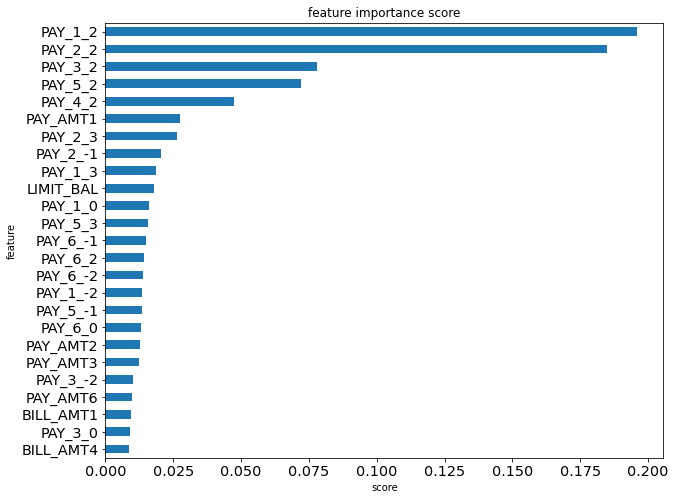

In [ ]:
show_feature_importance(xg)

# Random Forest

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y_pred = model.predict(x_test)
    y_pred_train = model.predict(x_train)
    y_pred_proba = model.predict_proba(x_test)
    y_pred_proba_train = model.predict_proba(x_train)
    y_pred_datatest = model.predict(x_test)

    cm = confusion_matrix(y_test, y_pred_datatest)
    tn, fp, fn, tp = cm.ravel()

    print("Accuracy (Test Set): %.2f" % accuracy_score(y_test, y_pred))
    print("Precision (Test Set): %.2f" % precision_score(y_test, y_pred))
    print("Recall (Test Set): %.2f" % recall_score(y_test, y_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y_test, y_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y_test, y_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y_train, y_pred_proba_train[:, 1]))

    print('TP  : {}\nFP  : {}\nFN  : {}\nTN  : {}\n'.format(tp, fp, fn, tn))

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(random_state=42)
rf.fit(x_train, y_train)
eval_classification(rf)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.66
Recall (Test Set): 0.34
F1-Score (Test Set): 0.45
roc_auc (test-proba): 0.74
roc_auc (train-proba): 1.00
TP  : 475
FP  : 249
FN  : 933
TN  : 4643



##Hyperparameter Tuning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV

n_estimators = [int(x) for x in np.linspace(1, 200, 50)]
criterion = ['gini', 'entropy']
max_depth = [int(x) for x in np.linspace(2, 100, 50)]
min_samples_split = [int(x) for x in np.linspace(2, 20, 10)]
min_samples_leaf = [int(x) for x in np.linspace(2, 20, 10)]
hyperparameters = dict(n_estimators=n_estimators, criterion=criterion, max_depth=max_depth,
                       min_samples_split=min_samples_split, min_samples_leaf=min_samples_leaf)

rf = RandomForestClassifier(random_state=42)
rs = RandomizedSearchCV(rf, hyperparameters, scoring='roc_auc', random_state=1, cv=5)
rs.fit(x_train, y_train)
eval_classification(rs)

Accuracy (Test Set): 0.81
Precision (Test Set): 0.67
Recall (Test Set): 0.33
F1-Score (Test Set): 0.44
roc_auc (test-proba): 0.75
roc_auc (train-proba): 0.89
TP  : 461
FP  : 231
FN  : 947
TN  : 4661



# Decision Tree

In [ ]:
# Categorizing data based on their data type except for ID column and default_payment_next_month column

# Categorical data
categorical = ['SEX','EDUCATION','MARRIAGE']
pay_delay = ['PAY_1','PAY_2','PAY_3','PAY_4','PAY_5','PAY_6']

# Numerical data
numerical = ['LIMIT_BAL', 'AGE',
             'BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6',
             'PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

numerical1 = ['LIMIT_BAL','AGE']

bill_amt = ['BILL_AMT1','BILL_AMT2','BILL_AMT3','BILL_AMT4','BILL_AMT5','BILL_AMT6']
pay_amt = ['PAY_AMT1','PAY_AMT2','PAY_AMT3','PAY_AMT4','PAY_AMT5','PAY_AMT6']

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/dataset/train_20D8GL3.csv')

In [ ]:
df13 = df

In [ ]:
df13.head(2)

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default_payment_next_month
0,25150,360000,2,2,2,25,-1,-1,-1,-1,-1,-1,20952,12590,3479,3435,8870,2020,12590,3479,3446,8870,2020,27043,0
1,13470,240000,2,1,2,46,2,2,-2,-1,0,-1,456,0,0,2240,1681,2267,0,0,2240,0,2267,3074,0


In [ ]:
df13.rename(columns = {'PAY_0': 'PAY_1'},inplace = True)

In [ ]:
df13["MARRIAGE"] = df13["MARRIAGE"].replace(0, "UNKNOWN")
df13["MARRIAGE"] = df13["MARRIAGE"].replace(1, "MARRIED")
df13["MARRIAGE"] = df13["MARRIAGE"].replace(2, "SINGLE")
df13["MARRIAGE"] = df13["MARRIAGE"].replace(3, "DIVORCED")

In [ ]:
OHE = pd.get_dummies(df13['MARRIAGE'], prefix = 'MARRIAGE_STATUS')
df13 = df13.join(OHE)

In [ ]:
for i in ['PAY_1', 'PAY_2','PAY_3','PAY_4','PAY_5','PAY_6'] :
    OHE1 = pd.get_dummies(df13[i], prefix = i)
    df13 = df13.join(OHE1)

In [ ]:
# Splitting dataset into 70% training data and 30% testing data
from sklearn.model_selection import train_test_split
df13_train,df13_test = train_test_split(df13, test_size=0.3, random_state=42)

print(f"Dimensi df13_train : {df13_train.shape}\nDimensi df13_test  : {df13_test.shape}")

Dimensi df13_train : (14700, 92)
Dimensi df13_test  : (6300, 92)


In [ ]:
from scipy import stats

filter = np.array([True] * len(df13_train))

for i in numerical:
  zscore = np.abs(stats.zscore(df13_train[i]))
  filter = (zscore < 3) & filter

df13_train_zscore = df13_train[filter]

df13_train_filtered1 = round(len(df13_train_zscore)/len(df13_train)*100,2)

print("Z-Score")
print(f"Jumlah baris sebelum handling outliers: {len(df13_train)}")
print(f"Jumlah baris sesudah handling outliers: {len(df13_train_zscore)}")
print()
print(f"Banyak baris yang tersisa setelah handling outliers: {df13_train_filtered1}%")
print(f"Banyak outlier yang terhapus: {round(100 - df13_train_filtered1,2)}% ")

Z-Score
Jumlah baris sebelum handling outliers: 14700
Jumlah baris sesudah handling outliers: 13263

Banyak baris yang tersisa setelah handling outliers: 90.22%
Banyak outlier yang terhapus: 9.78% 


In [ ]:
df13_train = df13_train_zscore
df13_train.shape

(13263, 92)

In [ ]:
from scipy.sparse import issparse

from sklearn.preprocessing import StandardScaler

In [ ]:
# Scaling Training Dataset
df13_train['AGE_STD'] = StandardScaler().fit_transform(df13_train['AGE'].values.reshape(len(df13_train), 1))

df13_train['LIMITBAL_STD'] = StandardScaler().fit_transform(df13_train['LIMIT_BAL'].values.reshape(len(df13_train), 1))

df13_train['BILLAMT1_STD'] = StandardScaler().fit_transform(df13_train['BILL_AMT1'].values.reshape(len(df13_train), 1))

df13_train['BILLAMT2_STD'] = StandardScaler().fit_transform(df13_train['BILL_AMT2'].values.reshape(len(df13_train), 1))

df13_train['BILLAMT3_STD'] = StandardScaler().fit_transform(df13_train['BILL_AMT3'].values.reshape(len(df13_train), 1))

df13_train['BILLAMT4_STD'] = StandardScaler().fit_transform(df13_train['BILL_AMT4'].values.reshape(len(df13_train), 1))

df13_train['BILLAMT5_STD'] = StandardScaler().fit_transform(df13_train['BILL_AMT5'].values.reshape(len(df13_train), 1))

df13_train['BILLAMT6_STD'] = StandardScaler().fit_transform(df13_train['BILL_AMT6'].values.reshape(len(df13_train), 1))

df13_train['PAYAMT1_STD'] = StandardScaler().fit_transform(df13_train['PAY_AMT1'].values.reshape(len(df13_train), 1))

df13_train['PAYAMT2_STD'] = StandardScaler().fit_transform(df13_train['PAY_AMT2'].values.reshape(len(df13_train), 1))

df13_train['PAYAMT3_STD'] = StandardScaler().fit_transform(df13_train['PAY_AMT3'].values.reshape(len(df13_train), 1))

df13_train['PAYAMT4_STD'] = StandardScaler().fit_transform(df13_train['PAY_AMT4'].values.reshape(len(df13_train), 1))

df13_train['PAYAMT5_STD'] = StandardScaler().fit_transform(df13_train['PAY_AMT5'].values.reshape(len(df13_train), 1))

df13_train['PAYAMT6_STD'] = StandardScaler().fit_transform(df13_train['PAY_AMT6'].values.reshape(len(df13_train), 1))

In [ ]:
df13_train = df13_train.drop(columns = ['ID','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'MARRIAGE',
                                       'LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

df13_train.shape

(13263, 84)

In [ ]:
# Scaling Testing Dataset
df13_test['AGE_STD'] = StandardScaler().fit_transform(df13_test['AGE'].values.reshape(len(df13_test), 1))

df13_test['LIMITBAL_STD'] = StandardScaler().fit_transform(df13_test['LIMIT_BAL'].values.reshape(len(df13_test), 1))

df13_test['BILLAMT1_STD'] = StandardScaler().fit_transform(df13_test['BILL_AMT1'].values.reshape(len(df13_test), 1))

df13_test['BILLAMT2_STD'] = StandardScaler().fit_transform(df13_test['BILL_AMT2'].values.reshape(len(df13_test), 1))

df13_test['BILLAMT3_STD'] = StandardScaler().fit_transform(df13_test['BILL_AMT3'].values.reshape(len(df13_test), 1))

df13_test['BILLAMT4_STD'] = StandardScaler().fit_transform(df13_test['BILL_AMT4'].values.reshape(len(df13_test), 1))

df13_test['BILLAMT5_STD'] = StandardScaler().fit_transform(df13_test['BILL_AMT5'].values.reshape(len(df13_test), 1))

df13_test['BILLAMT6_STD'] = StandardScaler().fit_transform(df13_test['BILL_AMT6'].values.reshape(len(df13_test), 1))

df13_test['PAYAMT1_STD'] = StandardScaler().fit_transform(df13_test['PAY_AMT1'].values.reshape(len(df13_test), 1))

df13_test['PAYAMT2_STD'] = StandardScaler().fit_transform(df13_test['PAY_AMT2'].values.reshape(len(df13_test), 1))

df13_test['PAYAMT3_STD'] = StandardScaler().fit_transform(df13_test['PAY_AMT3'].values.reshape(len(df13_test), 1))

df13_test['PAYAMT4_STD'] = StandardScaler().fit_transform(df13_test['PAY_AMT4'].values.reshape(len(df13_test), 1))

df13_test['PAYAMT5_STD'] = StandardScaler().fit_transform(df13_test['PAY_AMT5'].values.reshape(len(df13_test), 1))

df13_test['PAYAMT6_STD'] = StandardScaler().fit_transform(df13_test['PAY_AMT6'].values.reshape(len(df13_test), 1))

In [ ]:
df13_test = df13_test.drop(columns = ['ID','PAY_1', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'MARRIAGE',
                                       'LIMIT_BAL','AGE', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6',
                                      'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6'])

df13_test.shape

(6300, 84)

In [ ]:
# Splitting dataset into X and Y
x13_train = df13_train.drop(['default_payment_next_month'],axis=1)
y13_train = df13_train['default_payment_next_month']

print(f"Dimensi x13_train : {x13_train.shape}\nDimensi y13_train  : {y13_train.shape}")

x13_test = df13_test.drop(['default_payment_next_month'],axis=1)
y13_test = df13_test['default_payment_next_month']

print(f"Dimensi x13_test : {x13_test.shape}\nDimensi y13_test  : {y13_test.shape}")

Dimensi x13_train : (13263, 83)
Dimensi y13_train  : (13263,)
Dimensi x13_test : (6300, 83)
Dimensi y13_test  : (6300,)


In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.model_selection import cross_validate

def eval_classification(model):
    y13_pred = model.predict(x13_test)
    y13_pred_train = model.predict(x13_train)
    y13_pred_proba = model.predict_proba(x13_test)
    y13_pred_proba_train = model.predict_proba(x13_train)
    y13_pred_datatest = model.predict(x13_test)

    cm = confusion_matrix(y13_test,y13_pred_datatest)
    tn, fp, fn, tp = cm.ravel()

    print("Accuracy (Test Set): %.2f" % accuracy_score(y13_test,y13_pred))
    print("Precision (Test Set): %.2f" % precision_score(y13_test,y13_pred))
    print("Recall (Test Set): %.2f" % recall_score(y13_test,y13_pred))
    print("F1-Score (Test Set): %.2f" % f1_score(y13_test,y13_pred))

    print("roc_auc (test-proba): %.2f" % roc_auc_score(y13_test,y13_pred_proba[:, 1]))
    print("roc_auc (train-proba): %.2f" % roc_auc_score(y13_train,y13_pred_proba_train[:, 1]))\

    print()
    print('TP  : {}\nFP  : {}\nFN  : {}\nTN  : {}\n'.format(tp, fp, fn, tn))

X13 = x13_train

def show_feature_importance(model):
    feat_importances = pd.Series(model.feature_importances_, index=X13.columns)
    ax = feat_importances.nlargest(25).plot(kind='barh', figsize=(10, 8))
    ax.invert_yaxis()

    plt.xlabel('score')
    plt.ylabel('feature')
    plt.title('feature importance score')

def show_best_hyperparameter(model):
    print(model.best_estimator_.get_params())

### FIT MODEL

In [ ]:
from sklearn.tree import DecisionTreeClassifier # import decision tree dari sklearn
dt13 = DecisionTreeClassifier() # inisiasi object dengan nama dt13
dt13.fit(x13_train, y13_train) # fit model decision tree dari data train

print('\033[1mDecision Tree Evaluation\033[0m\n')
eval_classification(dt13)

Decision Tree Evaluation

Accuracy (Test Set): 0.71
Precision (Test Set): 0.39
Recall (Test Set): 0.47
F1-Score (Test Set): 0.42
roc_auc (test-proba): 0.63
roc_auc (train-proba): 1.00

TP  : 658
FP  : 1047
FN  : 750
TN  : 3845



### Hyperparameter Tunning

In [ ]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from scipy.stats import uniform
import numpy as np

# List of hyperparameter
max_depth = [int(x) for x in np.linspace(1, 10, 10)] # Maximum number of levels in tree

# min_samples_split = [2, 5, 10, 100] # Minimum number of samples required to split a node
min_samples_split = [int(x) for x in np.linspace(2, 10000, 50)]
# min_samples_split = [int(x) for x in np.linspace(2, 9000, 50)]

# min_samples_leaf = [1, 2, 4, 10, 20, 50] # Minimum number of samples required at each leaf node
min_samples_leaf = [int(x) for x in np.linspace(2, 2000, 50)]

max_features = ['auto', 'sqrt'] # Number of features to consider at every split
criterion = ['gini','entropy']
splitter = ['best','random']

hyperparameters = dict(max_depth=max_depth,
                       min_samples_split=min_samples_split,
                       min_samples_leaf=min_samples_leaf,
                       max_features=max_features,
                       criterion=criterion,
                       splitter=splitter
                      )

# Inisialisasi Model
dt13 = DecisionTreeClassifier(random_state=42)
rs_dt13 = RandomizedSearchCV(dt13, hyperparameters,scoring='roc_auc')
rs_dt13.fit(x13_train, y13_train)

# Predict & Evaluation
y13_pred = rs_dt13.predict(x13_test) #Check performa dari model

print('\033[1mDecision Tree Evaluation - Hyperparameter Tuning\033[0m\n')
eval_classification(rs_dt13)

Decision Tree Evaluation - Hyperparameter Tuning

Accuracy (Test Set): 0.81
Precision (Test Set): 0.64
Recall (Test Set): 0.33
F1-Score (Test Set): 0.43
roc_auc (test-proba): 0.73
roc_auc (train-proba): 0.73

TP  : 459
FP  : 254
FN  : 949
TN  : 4638



In [ ]:
show_best_hyperparameter(rs_dt13)

{'ccp_alpha': 0.0, 'class_weight': None, 'criterion': 'gini', 'max_depth': 6, 'max_features': 'sqrt', 'max_leaf_nodes': None, 'min_impurity_decrease': 0.0, 'min_samples_leaf': 165, 'min_samples_split': 2, 'min_weight_fraction_leaf': 0.0, 'random_state': 42, 'splitter': 'random'}


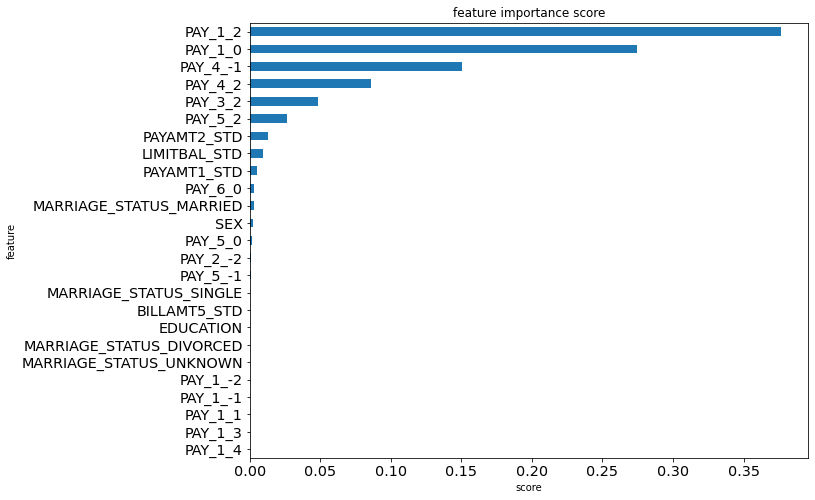

In [ ]:
show_feature_importance(rs_dt13.best_estimator_)